In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('./csv/stat_all_data_noabnormal_extend_mean_normalization.csv')
data_unnormalized = pd.read_csv('./csv/stat_all_data_noabnormal.csv')
data.shape
data.head()

filename  x_coordinate  y_coordinate  cane  segment  mortality  \
0  CF_2.0_B01_N01.npy           348           206     1        1       True   
1  CF_2.0_B01_N02.npy           373           222     1        1       True   
2  CF_2.0_B01_N03.npy           386           175     1        1       True   
3  CF_2.0_B01_N04.npy           325           183     1        2       True   
4  CF_2.0_B01_N05.npy           294           169     1        2       True   

  cultivar  treatment  dev_stage  starting_temperature  ...  curve_frame_590  \
0       CF          1          2                   0.0  ...        42.449584   
1       CF          1          2                   0.0  ...        42.747166   
2       CF          1          2                   0.0  ...        24.431293   
3       CF          1          2                   0.0  ...        61.389040   
4       CF          1          2                   0.0  ...        59.706652   

   curve_frame_591  curve_frame_592  curve_frame_593  curve_frame_594  \
0        41.776115        41.331670        41.193348        40.737566   
1        41.443311        40.615646        39.769841        39.463719   
2        24.617234        24.782766        24.995918        25.905215   
3        61.860695        61.423054        61.935525        62.482011   
4        59.309826        59.495767        59.711187        59.021844   

   curve_frame_595  curve_frame_596  curve_frame_597  curve_frame_598  \
0        40.306727        41.399698        41.714890        42.637793   
1        37.969388        37.810658        37.710884        37.266440   
2        25.614966        25.481179        24.521995        24.338322   
3        62.146410        62.665684        61.520559        61.976342   
4        58.194180        58.126153        57.253137        58.756538   

   curve_frame_599  
0        42.288587  
1        36.134921  
2        25.669388  
3        61.443462  
4        58.402797  

[5 rows x 615 columns]

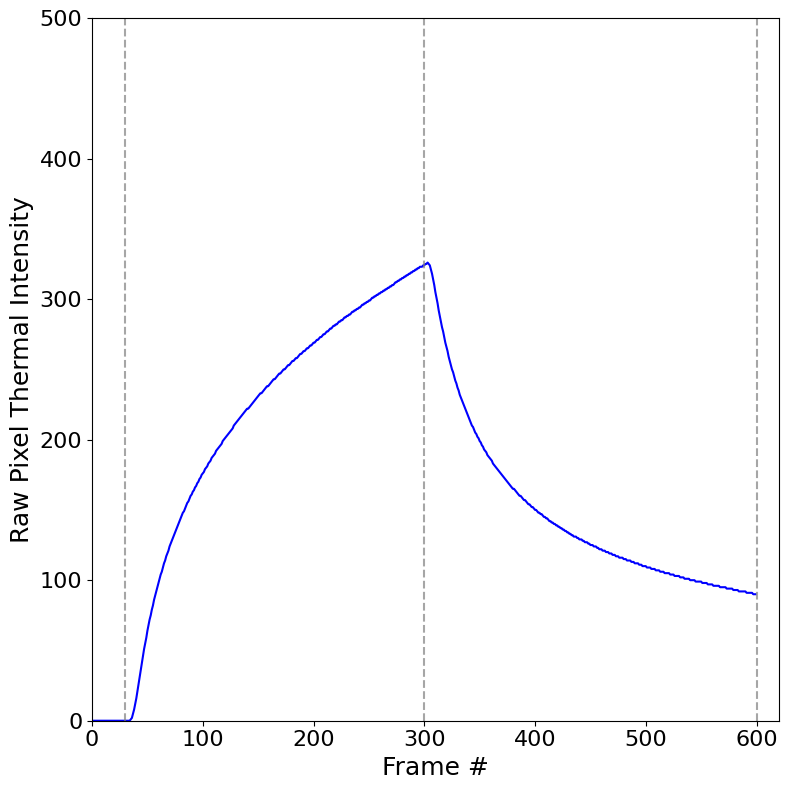

In [11]:
curve_columns = [col for col in data.columns if col.startswith('curve_frame_')]
mean_curve = data[curve_columns].mean().round().astype(np.uint16)


# Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the mean intensity curve with time in seconds on x-axis
ax.plot(np.arange(len(mean_curve)), mean_curve, label='Mean Thermal Signal', color='blue')

# Set x-axis label, y-axis label
ax.set_xlabel('Frame #', fontsize=18)
ax.set_ylabel('Raw Pixel Thermal Intensity', fontsize=18)
ax.tick_params(axis='both', labelsize=16)

# Adjust x-axis and y-axis range
ax.set_xlim(0, 620)  # Convert frames to seconds for x-axis range
ax.set_ylim(0, 500)

# Add vertical dotted lines and labels at corresponding seconds
dotted_lines = np.array([30, 300, 600])
labels = ['a', 'b', 'c']
for x, label in zip(dotted_lines, labels):
    ax.axvline(x=x, linestyle='--', color='gray', alpha=0.7)


plt.tight_layout()

# Save the plot as a high-quality image
plt.savefig('../paper/normalized_curve.svg', bbox_inches='tight')

plt.show()


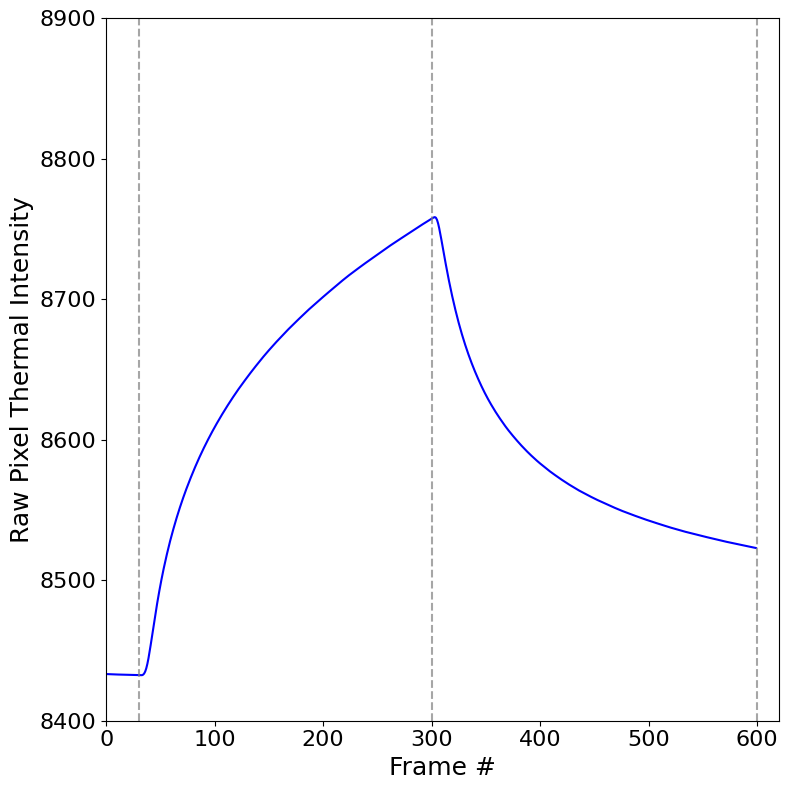

In [12]:
mean_curve = []
for index, row in data_unnormalized.iterrows():
    filename = row['filename']
    round_number = row['dev_stage']
    x_pt = row['x_coordinate']
    y_pt = row['y_coordinate']

    roi_data = np.load(f'../roi_data/round_{round_number}/[ROI]{filename}')
    curves = np.mean(roi_data, axis=(1, 2))
    mean_curve.append(curves)
mean_curve = np.array(mean_curve).mean(axis=0)


# Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the mean intensity curve with time in seconds on x-axis
ax.plot(np.arange(len(mean_curve)), mean_curve, label='Mean Thermal Signal', color='blue')

# Set x-axis label, y-axis label
ax.set_xlabel('Frame #', fontsize=18)
ax.set_ylabel('Raw Pixel Thermal Intensity', fontsize=18)
ax.tick_params(axis='both', labelsize=16)

# Adjust x-axis and y-axis range
ax.set_xlim(0, 620)  # Convert frames to seconds for x-axis range
ax.set_ylim(8400, 8900)

# Add vertical dotted lines and labels at corresponding seconds
dotted_lines = np.array([30, 300, 600])
labels = ['a', 'b', 'c']
for x, label in zip(dotted_lines, labels):
    ax.axvline(x=x, linestyle='--', color='gray', alpha=0.7)


plt.tight_layout()

# Save the plot as a high-quality image
plt.savefig('../paper/unnormalized_curve.svg', bbox_inches='tight')

plt.show()


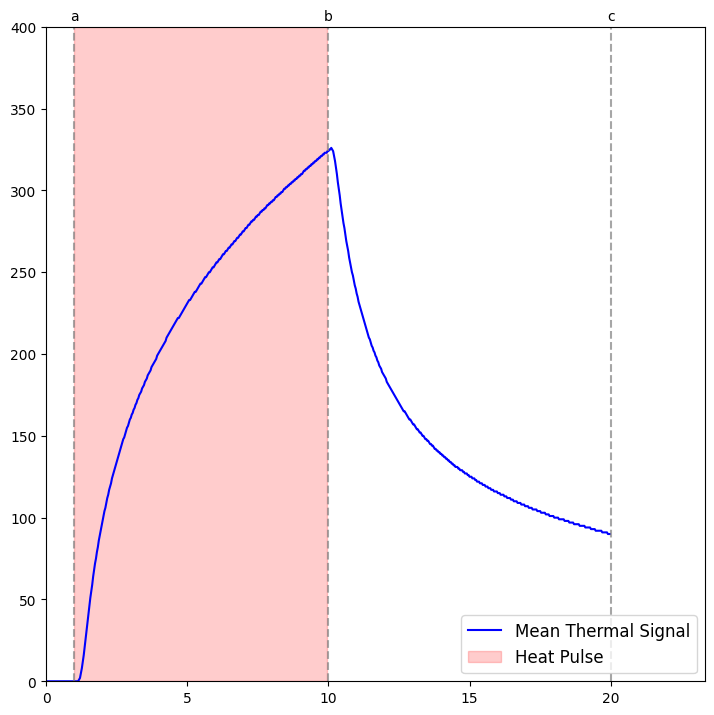

In [ ]:
curve_columns = [col for col in data.columns if col.startswith('curve_frame_')]
mean_curve = data[curve_columns].mean().round().astype(np.uint16)

# Frame rate
fps = 30
time = np.arange(len(mean_curve)) / fps

# Create the square wave with null values outside 1s to 10s
square_wave = np.full(len(mean_curve), np.nan)  # Initialize with NaNs
start_frame = int(1 * fps)  # Start at 1 second
end_frame = int(10 * fps)  # End at 10 seconds
square_wave[start_frame:end_frame] = 400  # Assign value within 1s to 10s

# Plot
fig, ax = plt.subplots(figsize=(8.5, 8.5))

# Plot the mean intensity curve with time in seconds on x-axis
ax.plot(time, mean_curve, label='Mean Thermal Signal', color='blue')

# Set x-axis label, y-axis label
ax.set_xlabel('Time (seconds)', fontsize=12)
ax.set_ylabel('Raw Pixel Thermal Intensity', fontsize=12)
ax.tick_params(axis='both', labelsize=10)

# Adjust x-axis and y-axis range
ax.set_xlim(0, 700 / fps)  # Convert frames to seconds for x-axis range
ax.set_ylim(0, 400)

# Add vertical dotted lines and labels at corresponding seconds
dotted_lines = np.array([30, 300, 600]) / fps  # Convert frames to seconds
labels = ['a', 'b', 'c']
for x, label in zip(dotted_lines, labels):
    ax.axvline(x=x, linestyle='--', color='gray', alpha=0.7)
    ax.text(x, ax.get_ylim()[1] * 1.01, label, color='black', fontsize=10, ha='center')

# Add the shaded square wave with time on x-axis
ax.fill_between(time, square_wave, color='red', alpha=0.2, label='Heat Pulse')

# Add legend for square wave and mean curve at bottom right
ax.legend(loc='lower right', fontsize=12)

# Save the plot as a high-quality image
plt.savefig('./plots/Figure4.svg', bbox_inches='tight')

plt.show()


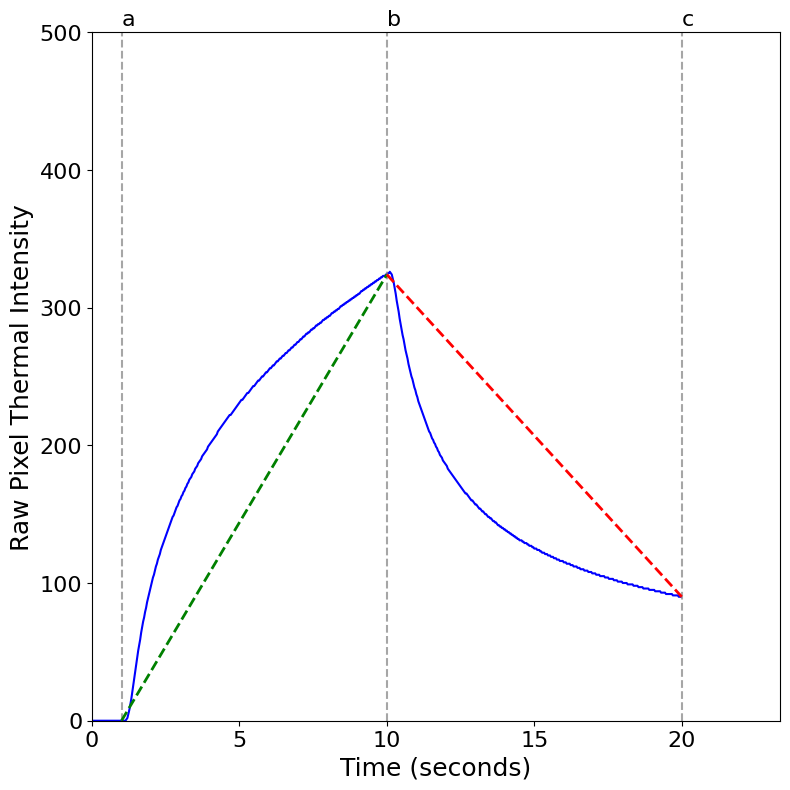

In [14]:
curve_columns = [col for col in data.columns if col.startswith('curve_frame_')]
mean_curve = data[curve_columns].mean().round().astype(np.uint16)

# Frame rate
fps = 30
time = np.arange(len(mean_curve)) / fps

# Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the mean intensity curve with time in seconds on x-axis
ax.plot(time, mean_curve, label='Mean Thermal Signal', color='blue')

# Set x-axis label, y-axis label
ax.set_xlabel('Time (seconds)', fontsize=18)
ax.set_ylabel('Raw Pixel Thermal Intensity', fontsize=18)
ax.tick_params(axis='both', labelsize=16)

# Adjust x-axis and y-axis range
ax.set_xlim(0, 700 / fps)  # Convert frames to seconds for x-axis range
ax.set_ylim(0, 500)

# Add vertical dotted lines and labels at corresponding seconds
dotted_lines = np.array([30, 300, 600]) / fps  # Convert frames to seconds
labels = ['a', 'b', 'c']
for x, label in zip(dotted_lines, labels):
    ax.axvline(x=x, linestyle='--', color='gray', alpha=0.7)
    ax.text(x, ax.get_ylim()[1] * 1.01, label, fontsize=16)

# Add the rising slope line
rising_start_time = 30 / fps
rising_end_time = 300 / fps
ax.plot(
    [rising_start_time, rising_end_time],
    [mean_curve[30], np.max(mean_curve[30:300])],
    color='green',
    linestyle='--',
    linewidth=2,
    label='Rising Waveform Feature'
)

# Add the falling slope line
falling_start_time = 300 / fps
falling_end_time = 600 / fps
ax.plot(
    [falling_start_time, falling_end_time],
    [np.max(mean_curve[30:300]), np.min(mean_curve[300:600])],
    color='red',
    linestyle='--',
    linewidth=2,
    label='Falling Waveform Feature'
)


plt.tight_layout()

# Save the plot as a high-quality image
plt.savefig('../paper/waveform_features.svg', bbox_inches='tight')

plt.show()


In [15]:
cultivar_map = {
    'CF': 'Cabernet Franc',
    'CON': 'Concord',
    'PN': 'Pinot Noir',
    'RIES': 'Riesling',
}

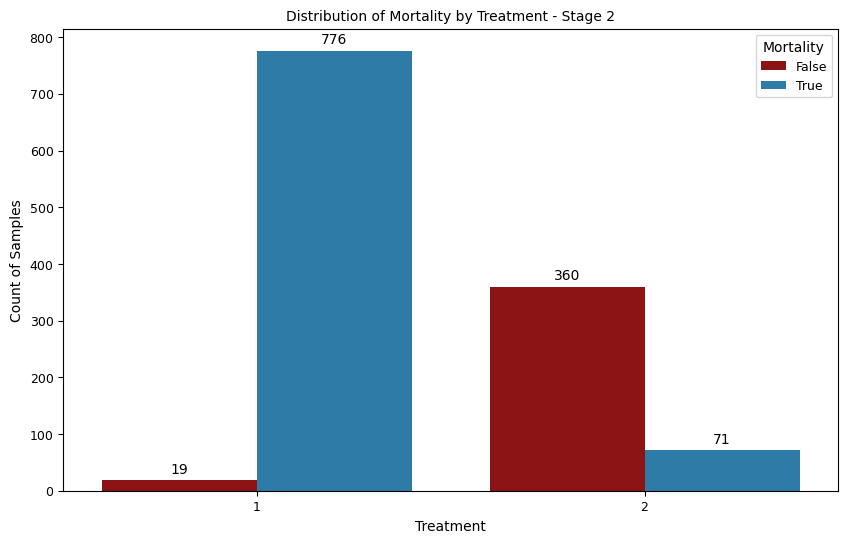

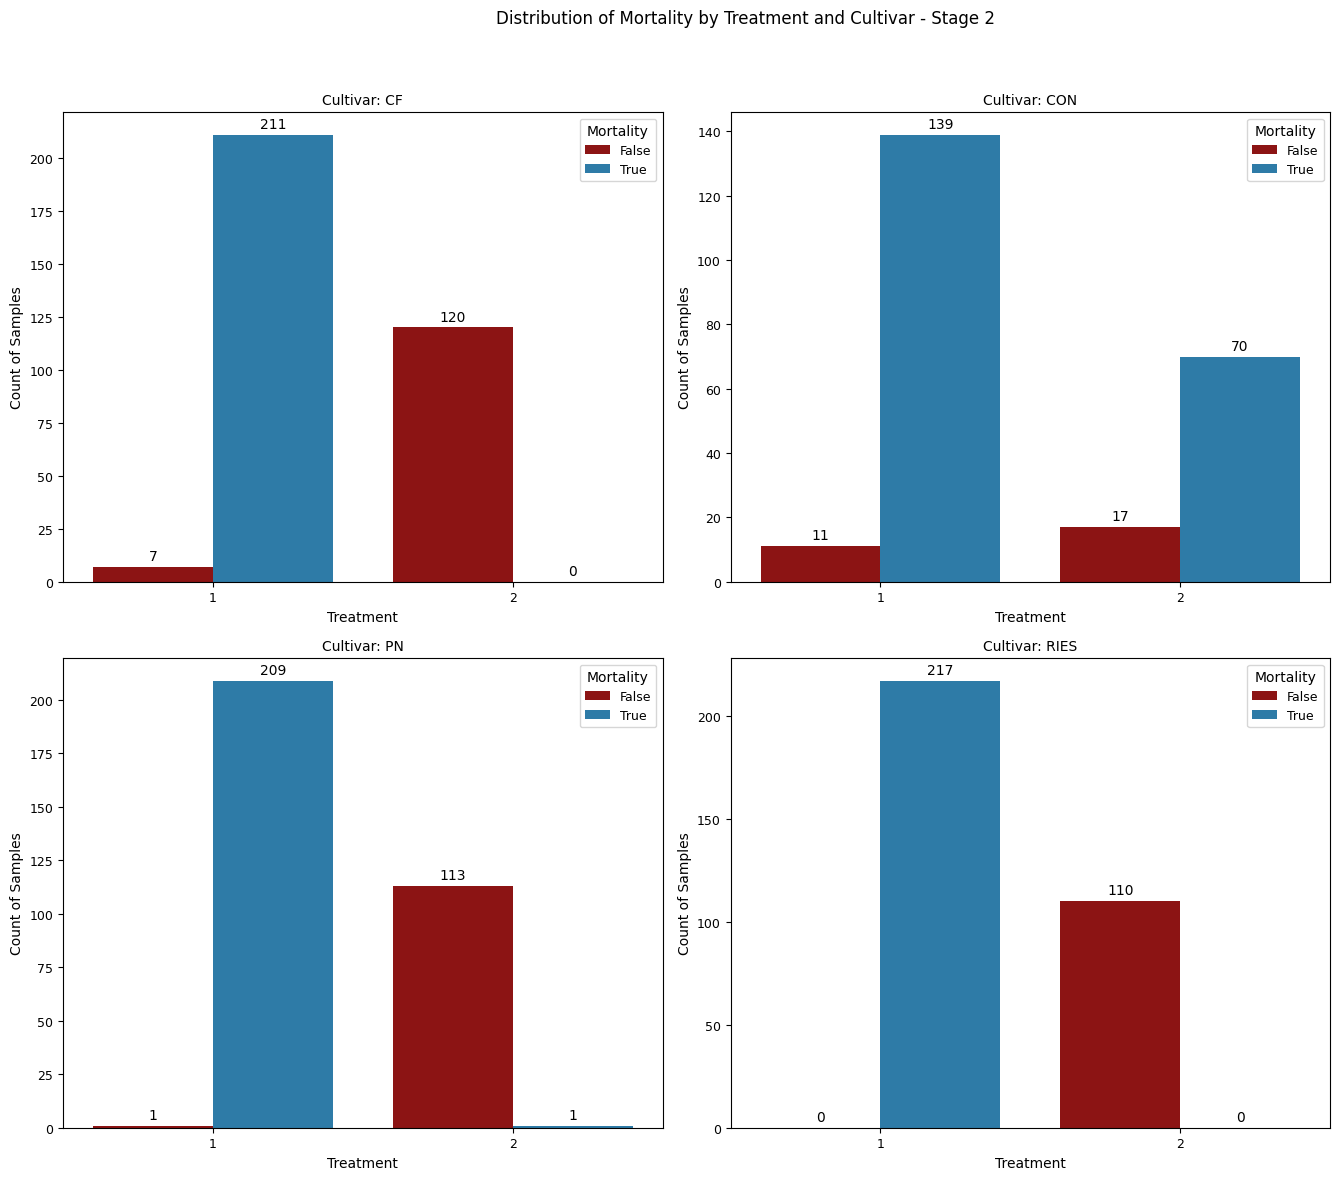

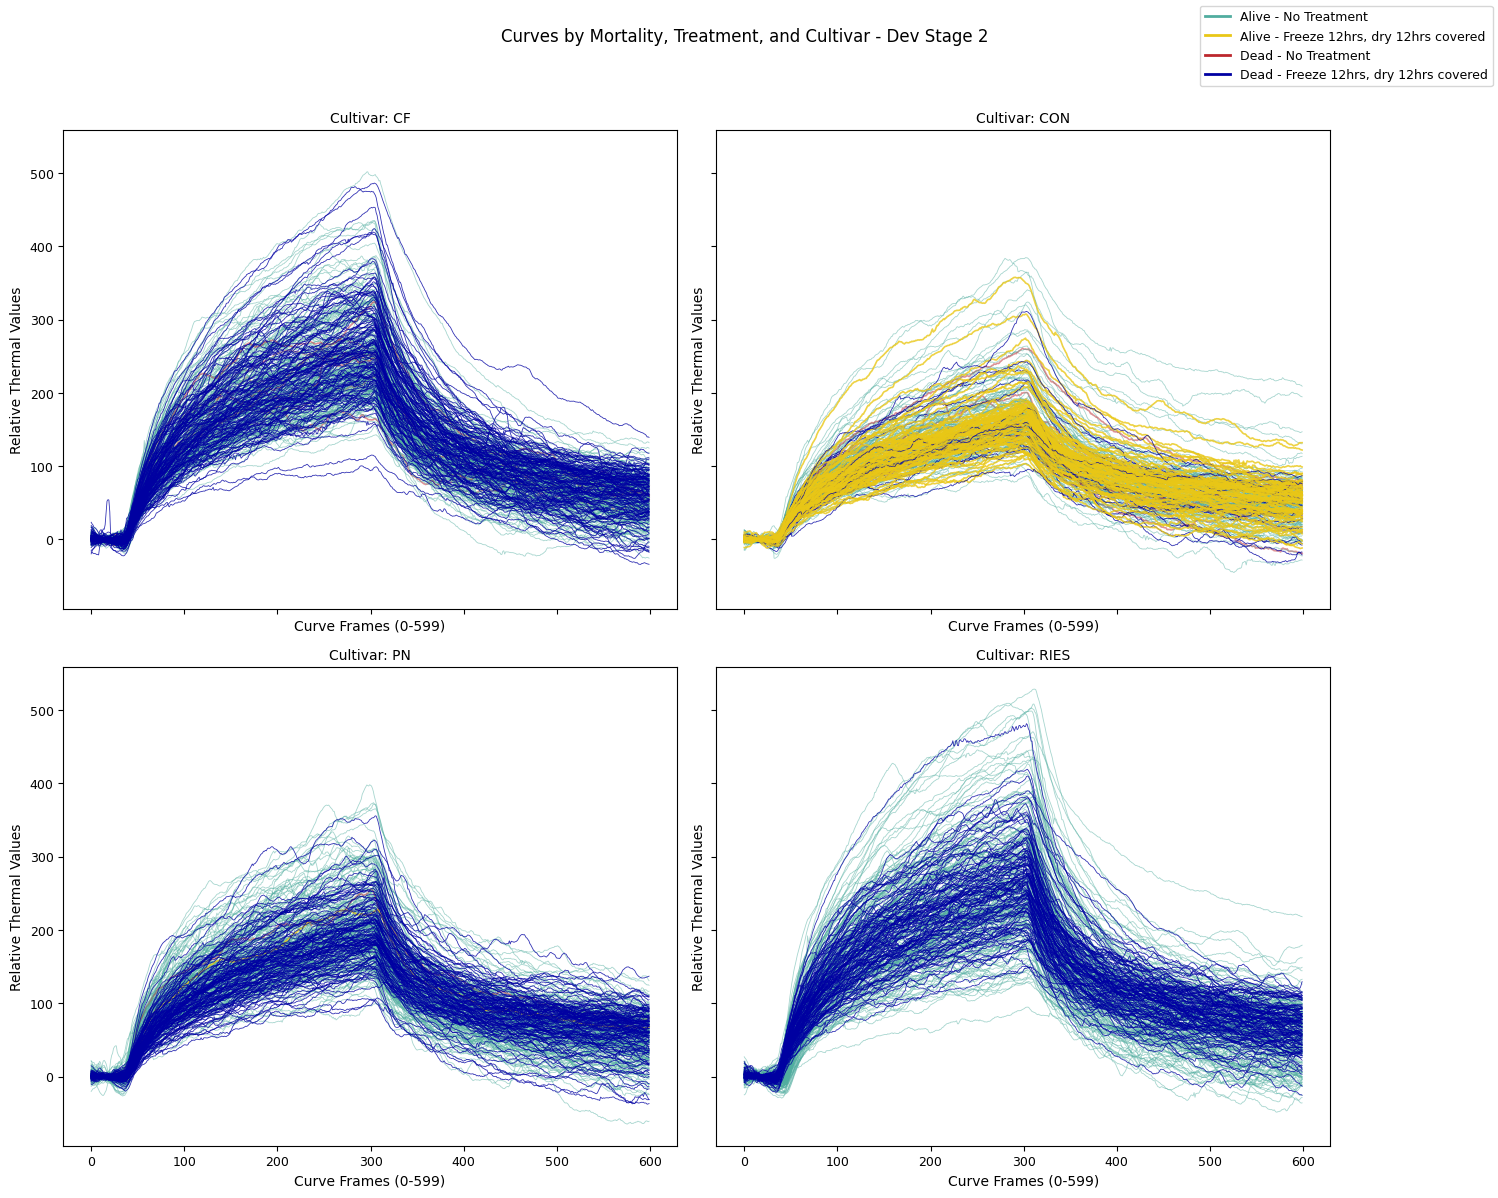

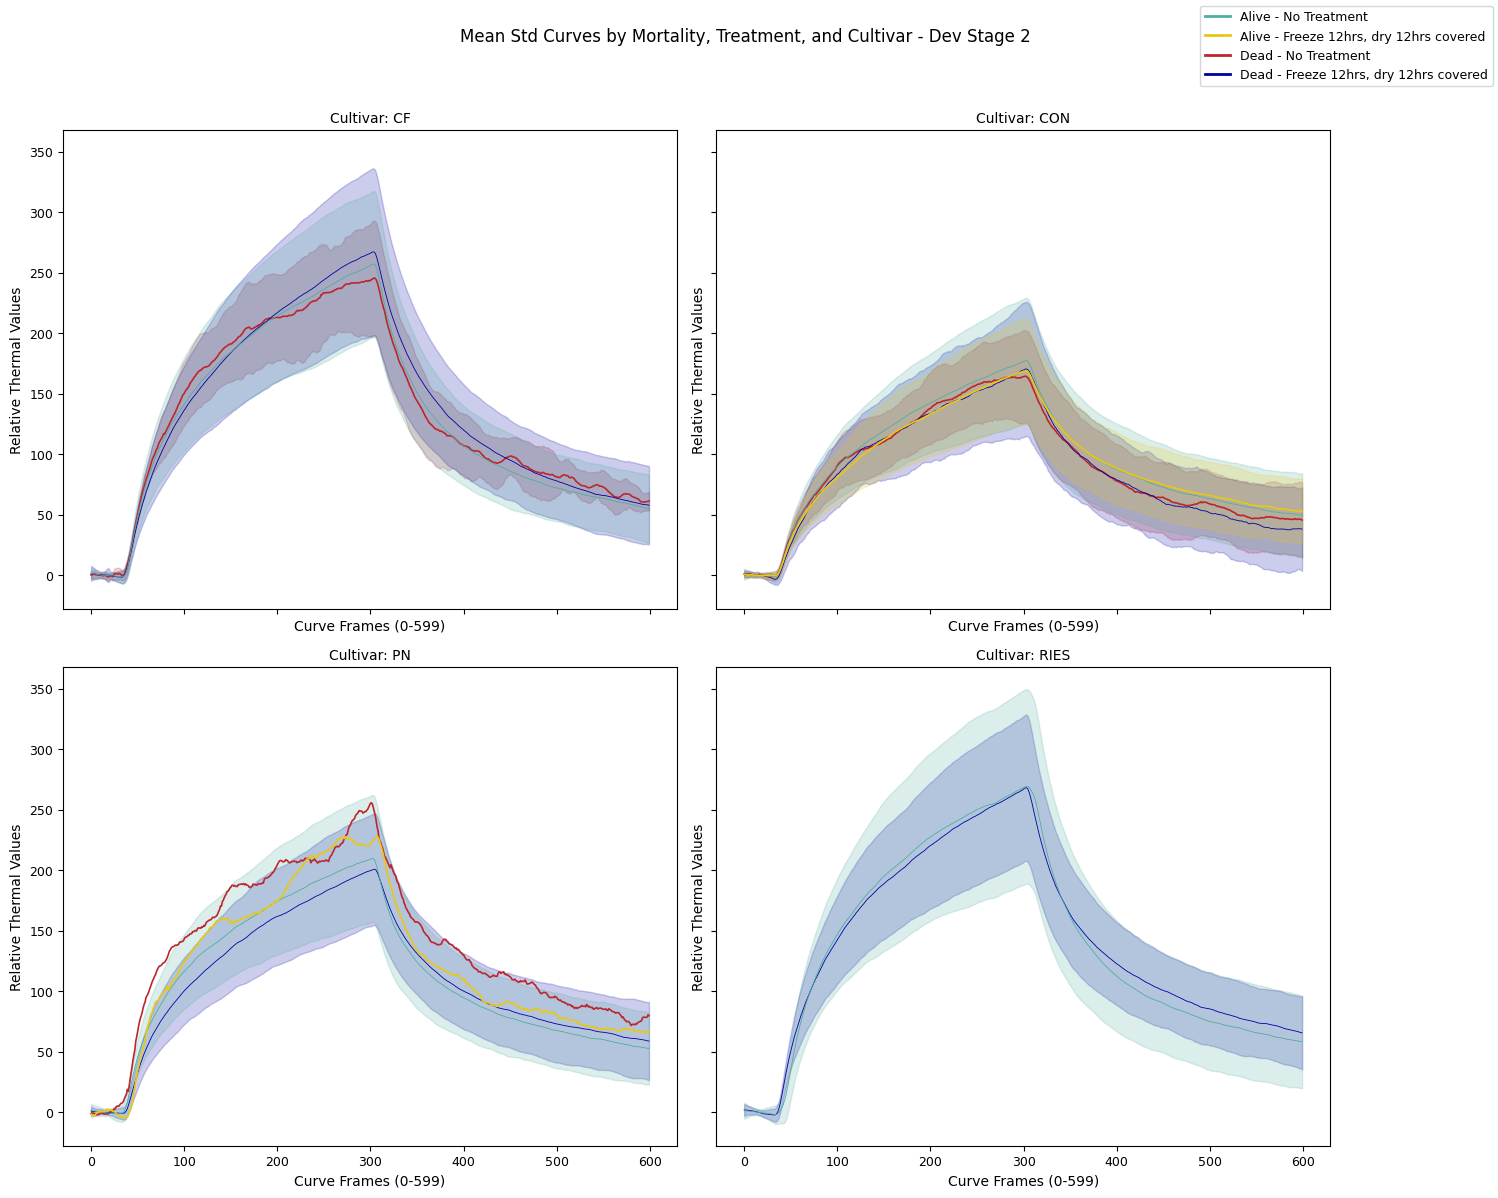

/var/folders/xg/96_j_3ms72n4410x6g1yggfh0000gn/T/ipykernel_9023/3352114667.py:126: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for mortality, group in cultivar_samples.groupby(['mortality']):
/var/folders/xg/96_j_3ms72n4410x6g1yggfh0000gn/T/ipykernel_9023/3352114667.py:126: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for mortality, group in cultivar_samples.groupby(['mortality']):
/var/folders/xg/96_j_3ms72n4410x6g1yggfh0000gn/T/ipykernel_9023/3352114667.py:126: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with 

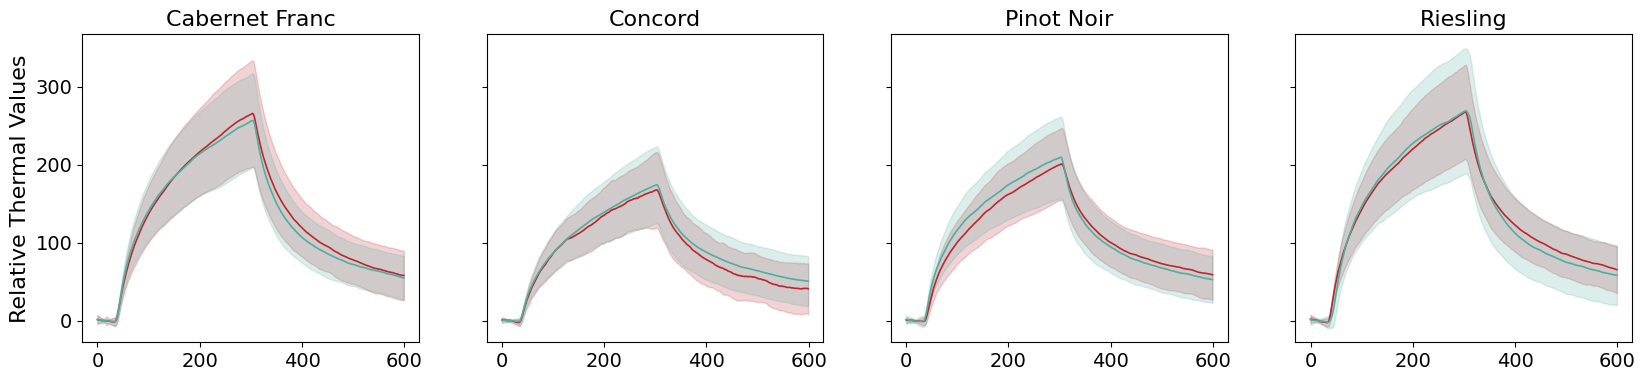

In [16]:
# Filter data for dev_stage 2 and ensure mortality is boolean
samples = data[data['dev_stage'] == 2].copy()
samples['mortality'] = samples['mortality'].astype(bool)

# Plot overall distribution of mortality and treatment
plt.figure(figsize=(10, 6))
plot = sns.countplot(data=samples, x='treatment', hue='mortality', palette={True: '#1a80bb', False: '#a00000'})
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='baseline', 
                  fontsize=10, color='black', xytext=(0, 5), 
                  textcoords='offset points')
plt.xlabel("Treatment")
plt.ylabel("Count of Samples")
plt.title("Distribution of Mortality by Treatment - Stage 2")
plt.legend(title='Mortality', labels=['False', 'True'])
plt.show()

# Plot distribution by cultivar
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
cultivars = samples['cultivar'].unique()
for idx, cultivar in enumerate(cultivars):
    ax = axs[idx // 2, idx % 2]
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    sns.countplot(data=cultivar_samples, x='treatment', hue='mortality', palette={True: '#1a80bb', False: '#a00000'}, ax=ax)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    ax.set_title(f"Cultivar: {cultivar}")
    ax.set_xlabel("Treatment")
    ax.set_ylabel("Count of Samples")
    ax.legend(title='Mortality', labels=['False', 'True'])

plt.suptitle("Distribution of Mortality by Treatment and Cultivar - Stage 2")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# Define curve columns and x-axis values
curve_columns = [col for col in samples.columns if col.startswith('curve_frame_')]
x_values = list(range(len(curve_columns)))

# Plot curves by cultivar with different styles for mortality and treatment
fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=True)
color_map = {
    (True, 2): ('#e9c716', 1.2, 0.8),  # Alive - Freeze 12hrs, dry 12hrs covered
    (True, 1): ('#50ad9f', 0.6, 0.5),       # Alive - No Treatment
    (False, 2): ('#0000a2', 0.6, 0.8),       # Dead - Freeze 12hrs, dry 12hrs covered
    (False, 1): ('#bc272d', 1.2, 0.5)         # Dead - No Treatment
}

for idx, cultivar in enumerate(cultivars):
    ax = axs[idx // 2, idx % 2]
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    for _, row in cultivar_samples.iterrows():
        color, linewidth, alpha = color_map[(row['mortality'], row['treatment'])]
        ax.plot(x_values, row[curve_columns], color=color, linewidth=linewidth, alpha=alpha)
    ax.set_title(f"Cultivar: {cultivar}")
    ax.set_xlabel("Curve Frames (0-599)")
    ax.set_ylabel("Relative Thermal Values")

# Add a common legend
fig.legend(
    handles=[
        Line2D([0], [0], color='#50ad9f', lw=2, label='Alive - No Treatment'),
        Line2D([0], [0], color='#e9c717', lw=2, label='Alive - Freeze 12hrs, dry 12hrs covered'),
        Line2D([0], [0], color='#bc272d', lw=2, label='Dead - No Treatment'),
        Line2D([0], [0], color='#0000a2', lw=2, label='Dead - Freeze 12hrs, dry 12hrs covered')
    ],
    loc='upper right'
)

plt.suptitle("Curves by Mortality, Treatment, and Cultivar - Dev Stage 2")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


# plot curves by cultivar with different styles for mortality and treatment, but plot a mean -+ std curve
fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=True)
for idx, cultivar in enumerate(cultivars):
    ax = axs[idx // 2, idx % 2]
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    for (mortality, treatment), group in cultivar_samples.groupby(['mortality', 'treatment']):
        group_mean = group[curve_columns].mean()
        group_std = group[curve_columns].std()
        color, linewidth, alpha = color_map[(mortality, treatment)]
        label = f"{'Alive' if mortality else 'Dead'} - Treatment {treatment}"
        ax.plot(x_values, group_mean, color=color, linewidth=linewidth, alpha=1.0, label=label)
        ax.fill_between(x_values, group_mean - group_std, group_mean + group_std, color=color, alpha=0.2)
    ax.set_title(f"Cultivar: {cultivar}")
    ax.set_xlabel("Curve Frames (0-599)")
    ax.set_ylabel("Relative Thermal Values")
fig.legend(
    handles=[
        Line2D([0], [0], color='#50ad9f', lw=2, label='Alive - No Treatment'),
        Line2D([0], [0], color='#e9c717', lw=2, label='Alive - Freeze 12hrs, dry 12hrs covered'),
        Line2D([0], [0], color='#bc272d', lw=2, label='Dead - No Treatment'),
        Line2D([0], [0], color='#0000a2', lw=2, label='Dead - Freeze 12hrs, dry 12hrs covered')
    ],
    loc='upper right'
)
plt.suptitle("Mean Std Curves by Mortality, Treatment, and Cultivar - Dev Stage 2")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


plt.rcParams.update({
    'font.size': 10,  # Set the minimum font size
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.titlesize': 12
})

fig, axs = plt.subplots(1, len(cultivars), figsize=(20, 4), sharex=True, sharey=True)

for idx, cultivar in enumerate(cultivars):
    ax = axs[idx]  # Single row access
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    
    for mortality, group in cultivar_samples.groupby(['mortality']):
        group_mean = group[curve_columns].mean()
        group_std = group[curve_columns].std()
        color, linewidth, alpha = color_map[(mortality, 1)]
        label = f"{'Alive' if mortality else 'Dead'}"
        ax.plot(x_values, group_mean, color=color, linewidth=1.2, alpha=1.0, label=label)
        ax.fill_between(x_values, group_mean - group_std, group_mean + group_std, color=color, alpha=0.2)
        ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(f"{cultivar_map[cultivar]}", fontsize=16)
    if idx == 0:  # Add ylabel only to the first subplot
        ax.set_ylabel("Relative Thermal Values", fontsize=16)

# Save the plot as a high-quality image
plt.savefig('./plots/Figure5_stage1.svg', bbox_inches='tight')
plt.show()

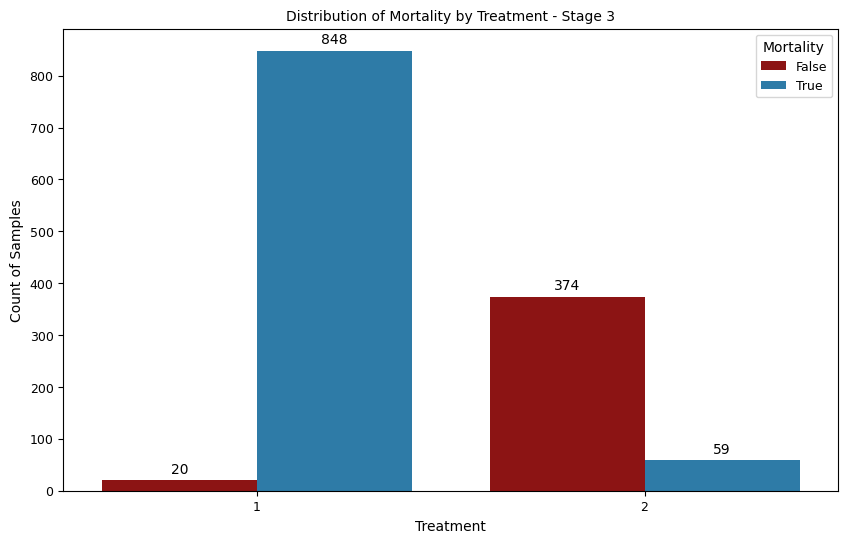

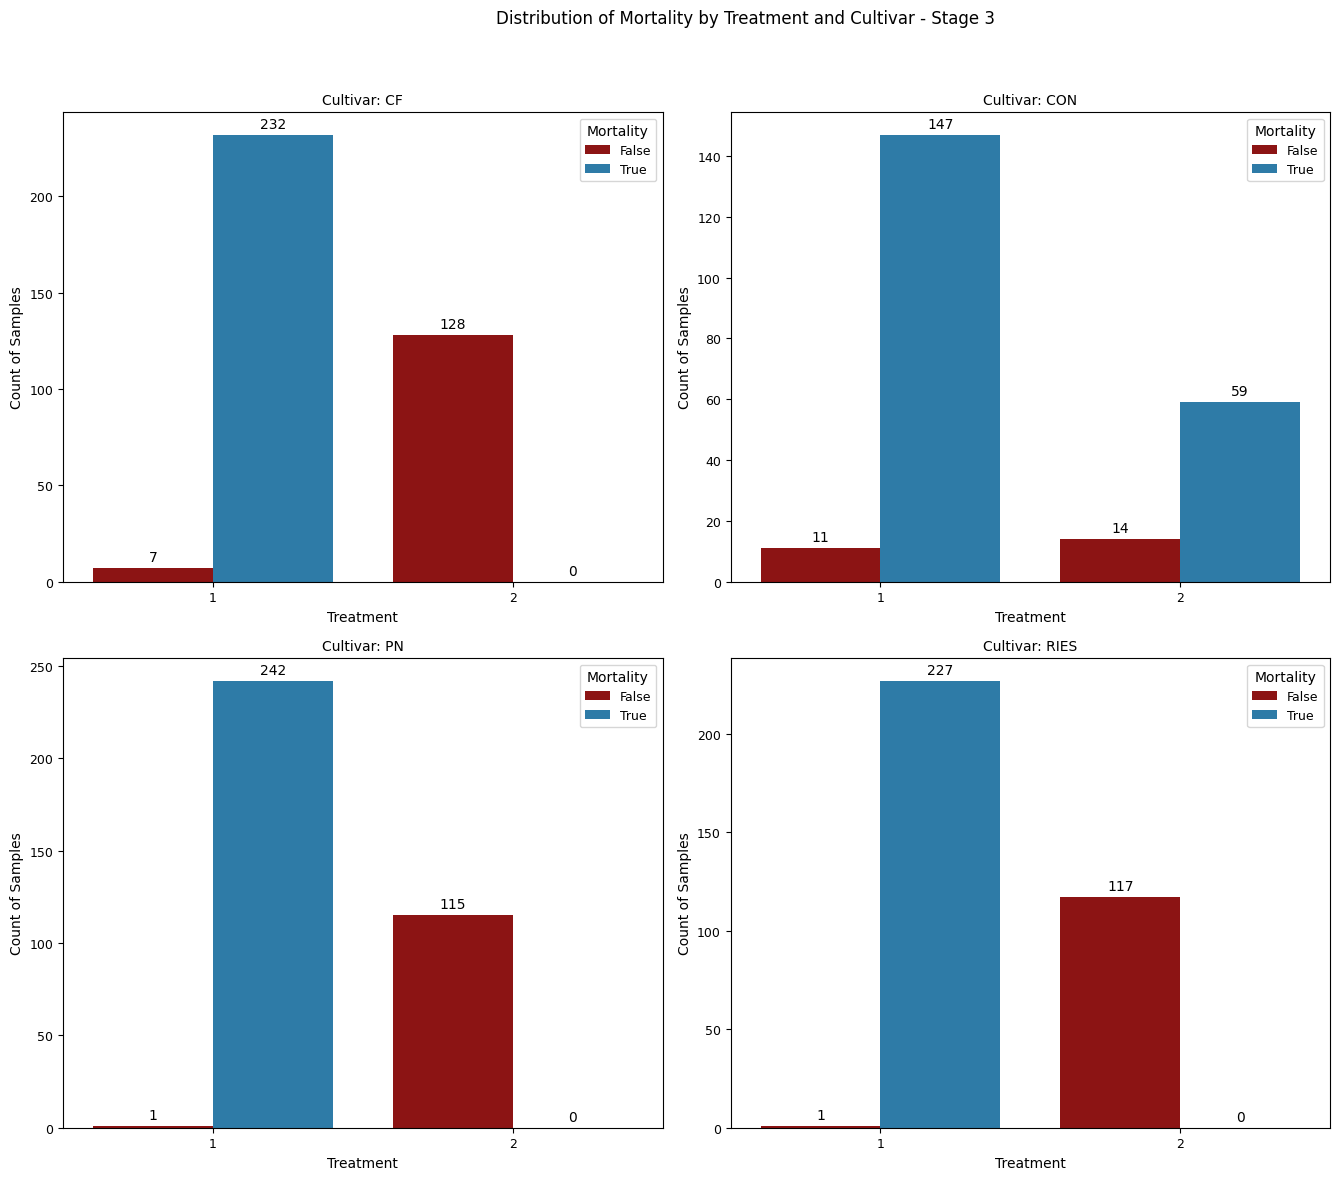

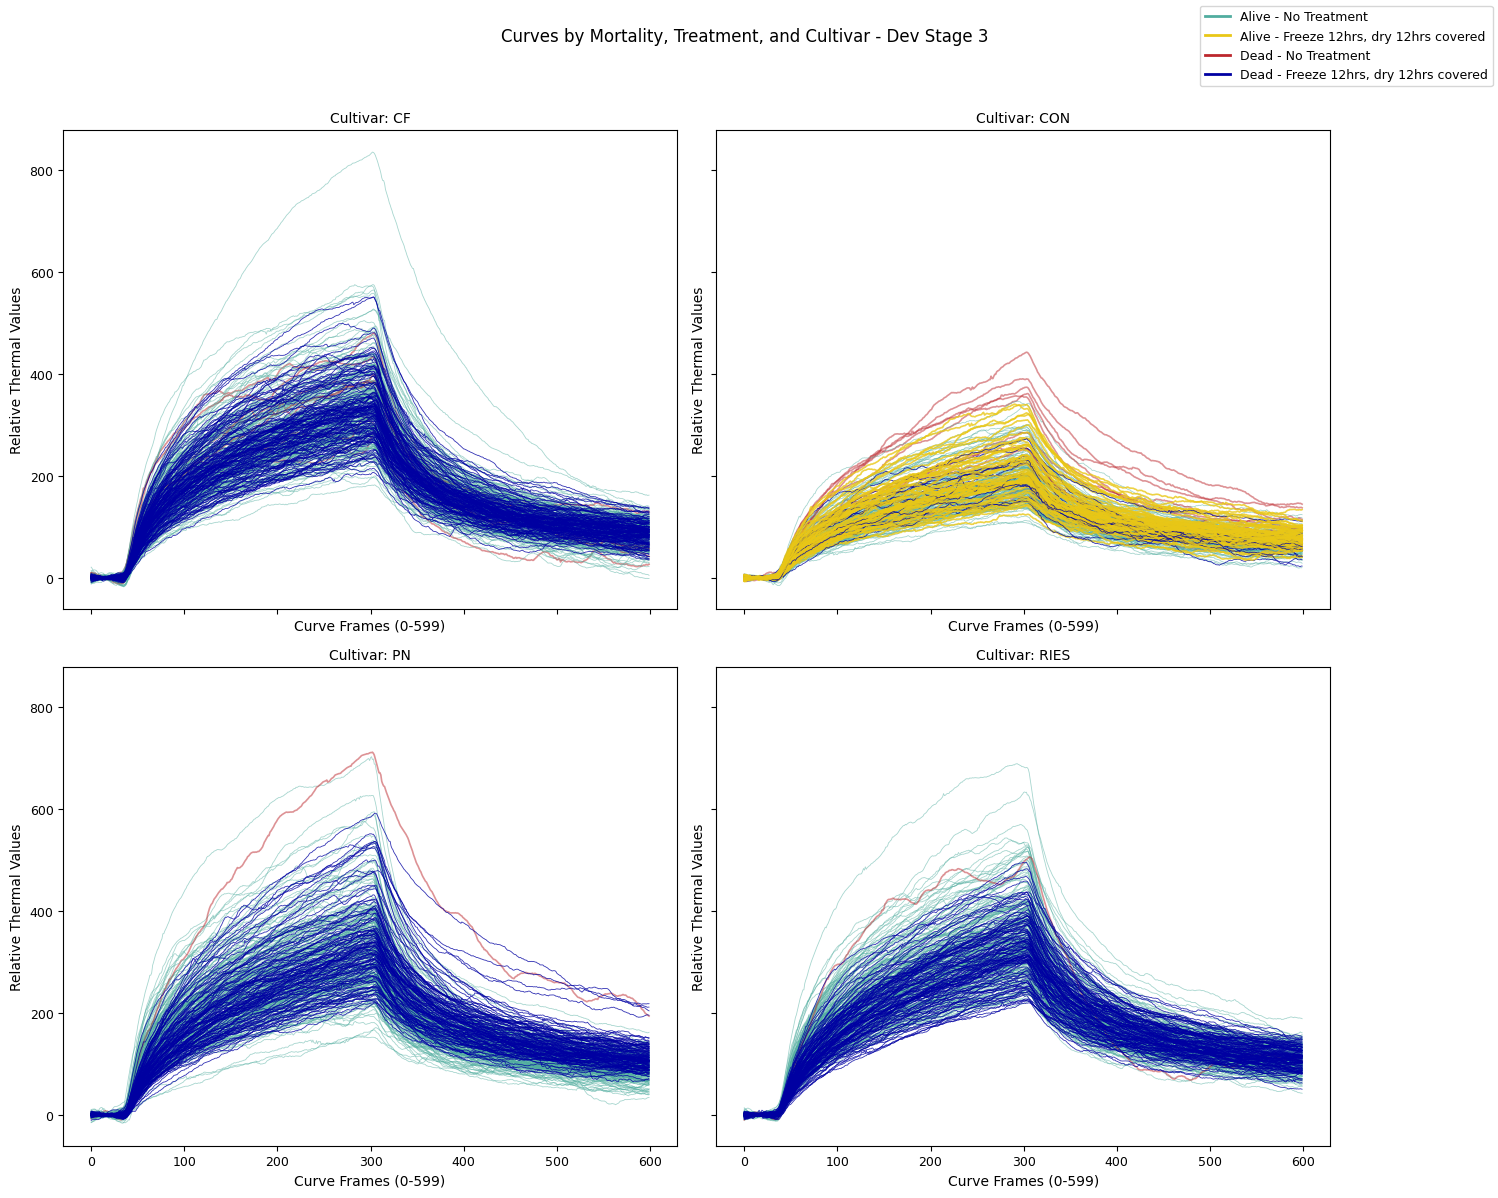

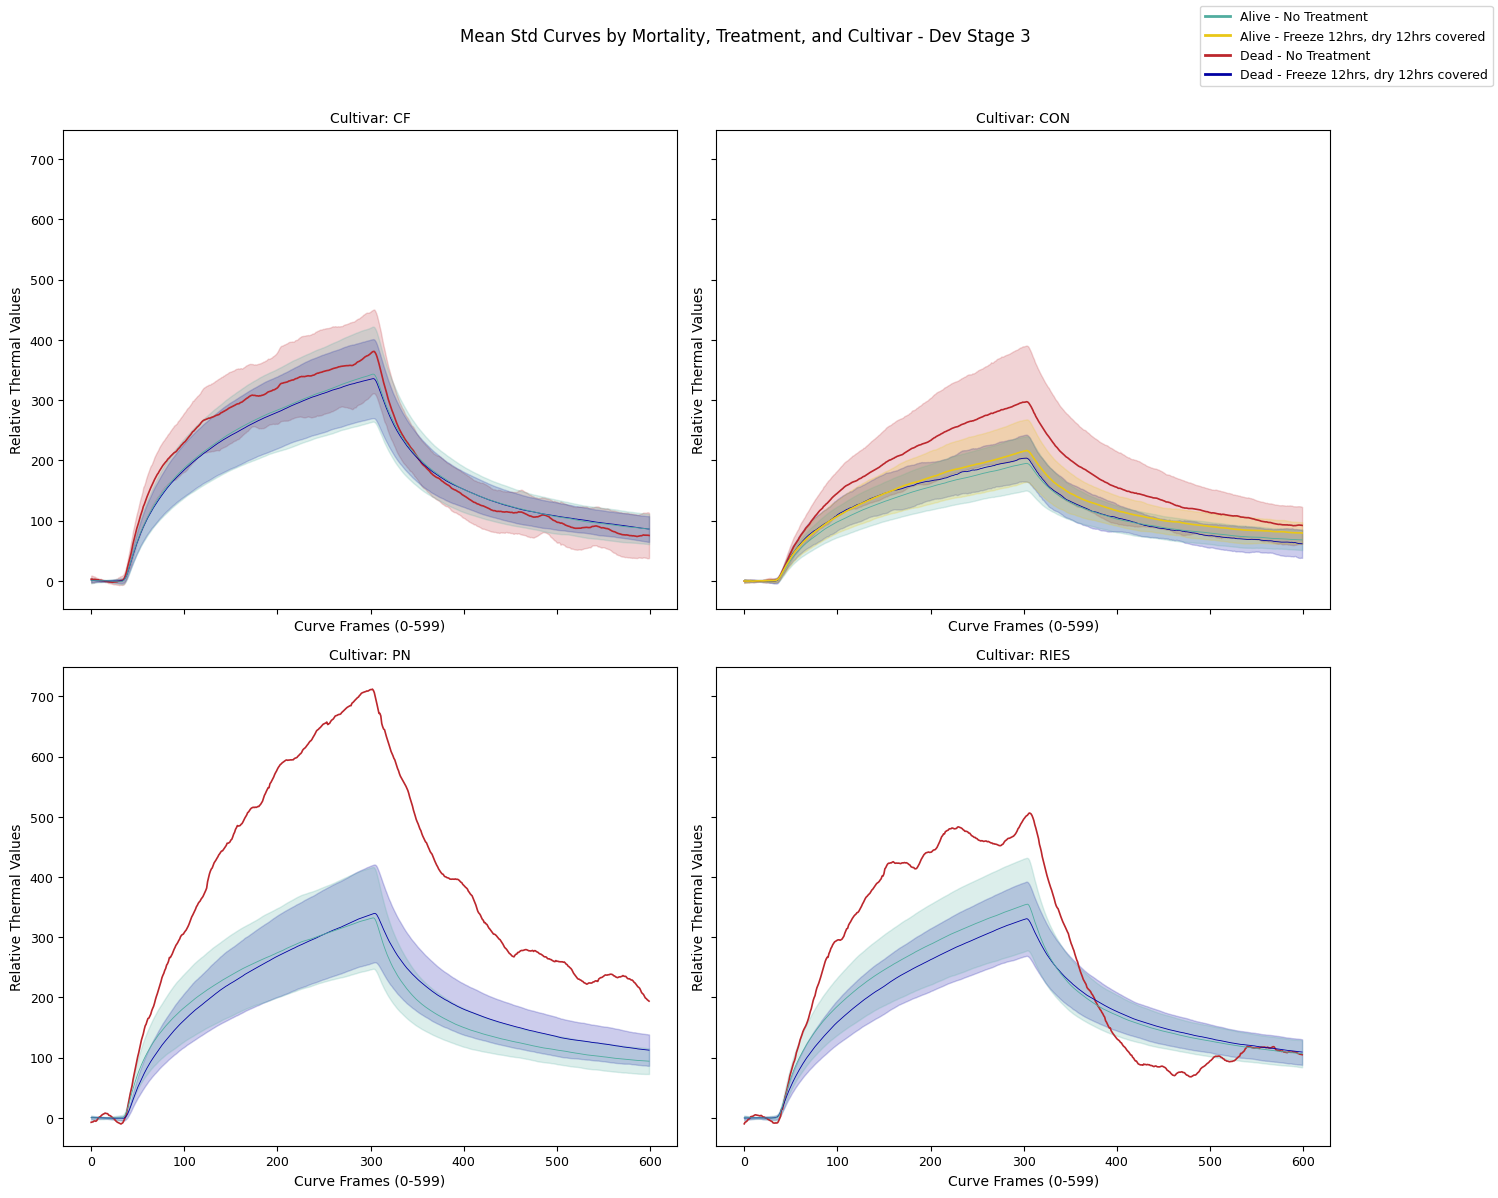

/var/folders/xg/96_j_3ms72n4410x6g1yggfh0000gn/T/ipykernel_9023/2224659875.py:127: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for mortality, group in cultivar_samples.groupby(['mortality']):
/var/folders/xg/96_j_3ms72n4410x6g1yggfh0000gn/T/ipykernel_9023/2224659875.py:127: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for mortality, group in cultivar_samples.groupby(['mortality']):
/var/folders/xg/96_j_3ms72n4410x6g1yggfh0000gn/T/ipykernel_9023/2224659875.py:127: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with 

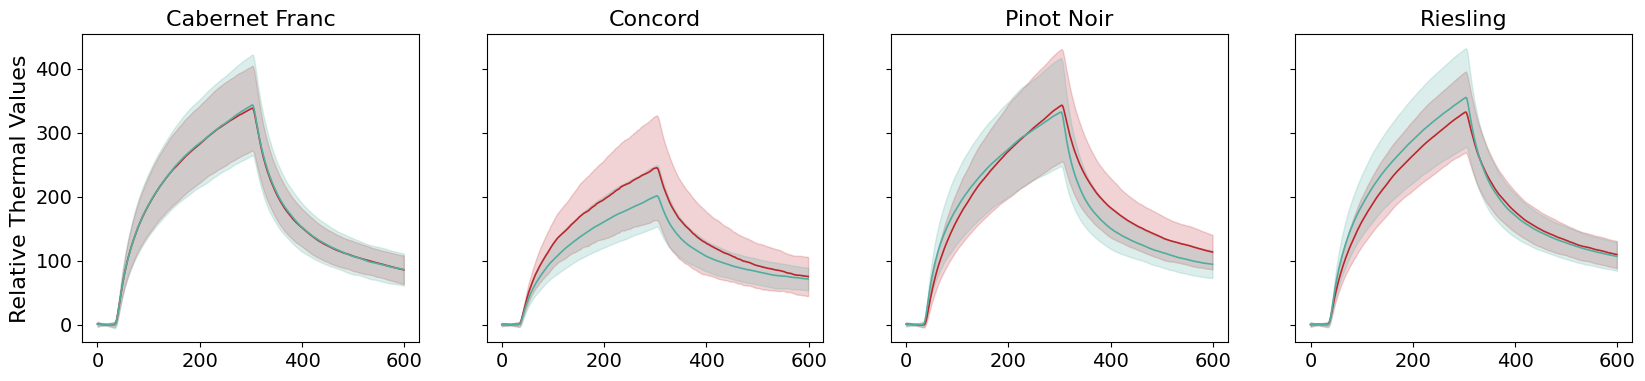

In [17]:
# Filter data for dev_stage 3 and ensure mortality is boolean
samples = data[data['dev_stage'] == 3].copy()
samples['mortality'] = samples['mortality'].astype(bool)

# Plot overall distribution of mortality and treatment
plt.figure(figsize=(10, 6))
plot = sns.countplot(data=samples, x='treatment', hue='mortality', palette={True: '#1a80bb', False: '#a00000'})
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='baseline', 
                  fontsize=10, color='black', xytext=(0, 5), 
                  textcoords='offset points')
plt.xlabel("Treatment")
plt.ylabel("Count of Samples")
plt.title("Distribution of Mortality by Treatment - Stage 3")
plt.legend(title='Mortality', labels=['False', 'True'])
plt.show()

# Plot distribution by cultivar
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
cultivars = samples['cultivar'].unique()
for idx, cultivar in enumerate(cultivars):
    ax = axs[idx // 2, idx % 2]
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    sns.countplot(data=cultivar_samples, x='treatment', hue='mortality', palette={True: '#1a80bb', False: '#a00000'}, ax=ax)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    ax.set_title(f"Cultivar: {cultivar}")
    ax.set_xlabel("Treatment")
    ax.set_ylabel("Count of Samples")
    ax.legend(title='Mortality', labels=['False', 'True'])

plt.suptitle("Distribution of Mortality by Treatment and Cultivar - Stage 3")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# Define curve columns and x-axis values
curve_columns = [col for col in samples.columns if col.startswith('curve_frame_')]
x_values = list(range(len(curve_columns)))

# Plot curves by cultivar with different styles for mortality and treatment
fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=True)
color_map = {
    (True, 2): ('#e9c716', 1.2, 0.8),  # Alive - Freeze 12hrs, dry 12hrs covered
    (True, 1): ('#50ad9f', 0.6, 0.5),       # Alive - No Treatment
    (False, 2): ('#0000a2', 0.6, 0.8),       # Dead - Freeze 12hrs, dry 12hrs covered
    (False, 1): ('#bc272d', 1.2, 0.5)         # Dead - No Treatment
}

for idx, cultivar in enumerate(cultivars):
    ax = axs[idx // 2, idx % 2]
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    for _, row in cultivar_samples.iterrows():
        color, linewidth, alpha = color_map[(row['mortality'], row['treatment'])]
        ax.plot(x_values, row[curve_columns], color=color, linewidth=linewidth, alpha=alpha)
    ax.set_title(f"Cultivar: {cultivar}")
    ax.set_xlabel("Curve Frames (0-599)")
    ax.set_ylabel("Relative Thermal Values")

# Add a common legend
fig.legend(
    handles=[
        Line2D([0], [0], color='#50ad9f', lw=2, label='Alive - No Treatment'),
        Line2D([0], [0], color='#e9c717', lw=2, label='Alive - Freeze 12hrs, dry 12hrs covered'),
        Line2D([0], [0], color='#bc272d', lw=2, label='Dead - No Treatment'),
        Line2D([0], [0], color='#0000a2', lw=2, label='Dead - Freeze 12hrs, dry 12hrs covered')
    ],
    loc='upper right'
)

plt.suptitle("Curves by Mortality, Treatment, and Cultivar - Dev Stage 3")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


# plot curves by cultivar with different styles for mortality and treatment, but plot a mean -+ std curve
fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=True)
for idx, cultivar in enumerate(cultivars):
    ax = axs[idx // 2, idx % 2]
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    for (mortality, treatment), group in cultivar_samples.groupby(['mortality', 'treatment']):
        group_mean = group[curve_columns].mean()
        group_std = group[curve_columns].std()
        color, linewidth, alpha = color_map[(mortality, treatment)]
        label = f"{'Alive' if mortality else 'Dead'} - Treatment {treatment}"
        ax.plot(x_values, group_mean, color=color, linewidth=linewidth, alpha=1.0, label=label)
        ax.fill_between(x_values, group_mean - group_std, group_mean + group_std, color=color, alpha=0.2)
    ax.set_title(f"Cultivar: {cultivar}")
    ax.set_xlabel("Curve Frames (0-599)")
    ax.set_ylabel("Relative Thermal Values")
fig.legend(
    handles=[
        Line2D([0], [0], color='#50ad9f', lw=2, label='Alive - No Treatment'),
        Line2D([0], [0], color='#e9c717', lw=2, label='Alive - Freeze 12hrs, dry 12hrs covered'),
        Line2D([0], [0], color='#bc272d', lw=2, label='Dead - No Treatment'),
        Line2D([0], [0], color='#0000a2', lw=2, label='Dead - Freeze 12hrs, dry 12hrs covered')
    ],
    loc='upper right'
)
plt.suptitle("Mean Std Curves by Mortality, Treatment, and Cultivar - Dev Stage 3")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


# plot curves by cultivar with different styles for mortality and treatment, plot a mean -+ std curve, but groups with only alive or dead
plt.rcParams.update({
    'font.size': 10,  # Set the minimum font size
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.titlesize': 12
})

fig, axs = plt.subplots(1, len(cultivars), figsize=(20, 4), sharex=True, sharey=True)  # Adjusted figsize for academic publication

for idx, cultivar in enumerate(cultivars):
    ax = axs[idx]  # Single row access
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    
    for mortality, group in cultivar_samples.groupby(['mortality']):
        group_mean = group[curve_columns].mean()
        group_std = group[curve_columns].std()
        color, linewidth, alpha = color_map[(mortality, 1)]
        label = f"{'Alive' if mortality else 'Dead'}"
        ax.plot(x_values, group_mean, color=color, linewidth=1.2, alpha=1.0, label=label)
        ax.fill_between(x_values, group_mean - group_std, group_mean + group_std, color=color, alpha=0.2)
        ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(f"{cultivar_map[cultivar]}", fontsize=16)
    if idx == 0:  # Add ylabel only to the first subplot
        ax.set_ylabel("Relative Thermal Values", fontsize=16)

# Save the plot as a high-quality image
plt.savefig('./plots/Figure5_stage2.svg', bbox_inches='tight')
plt.show()

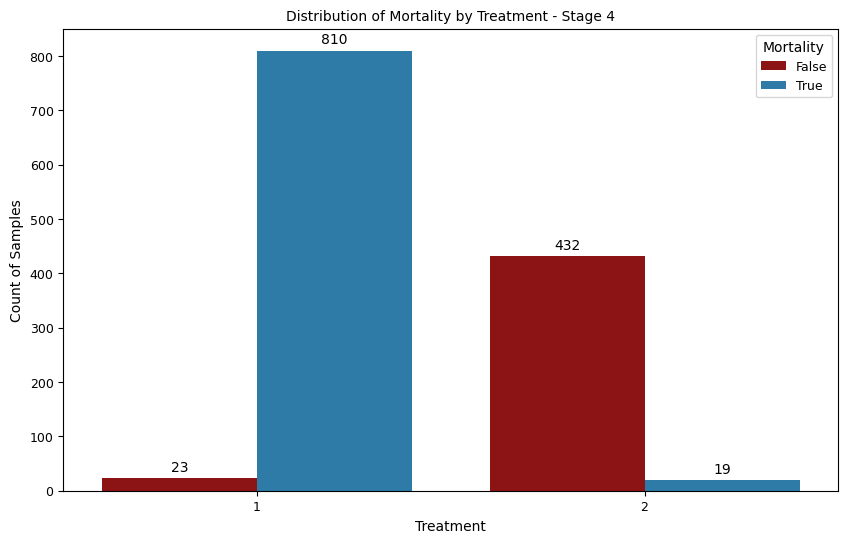

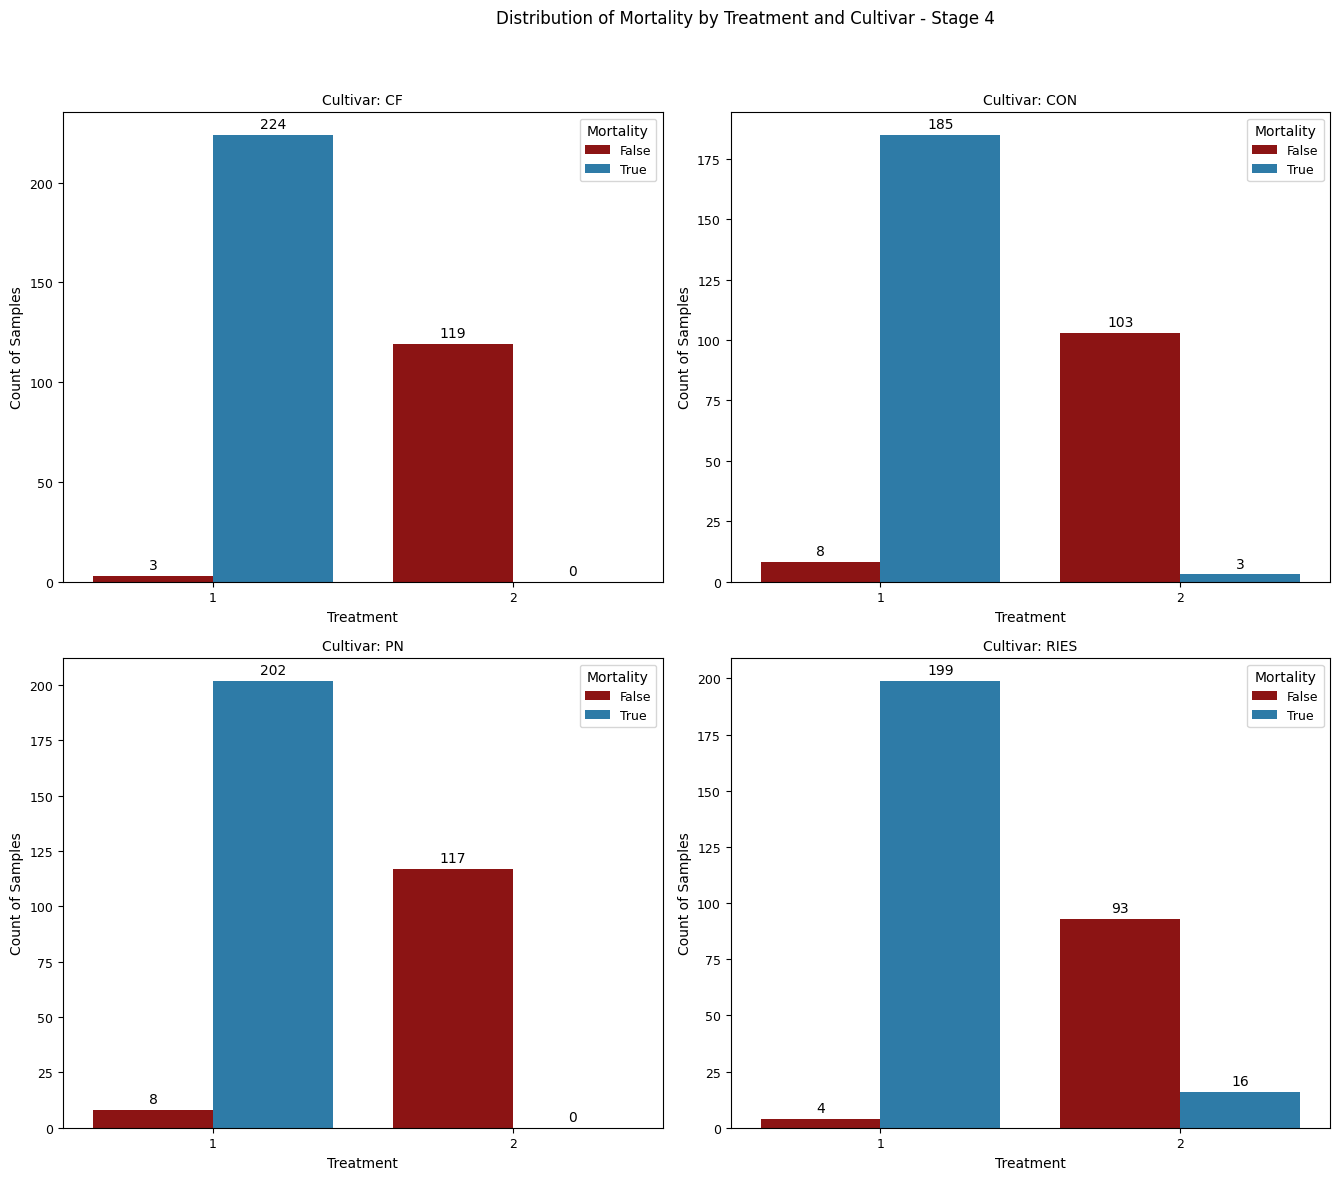

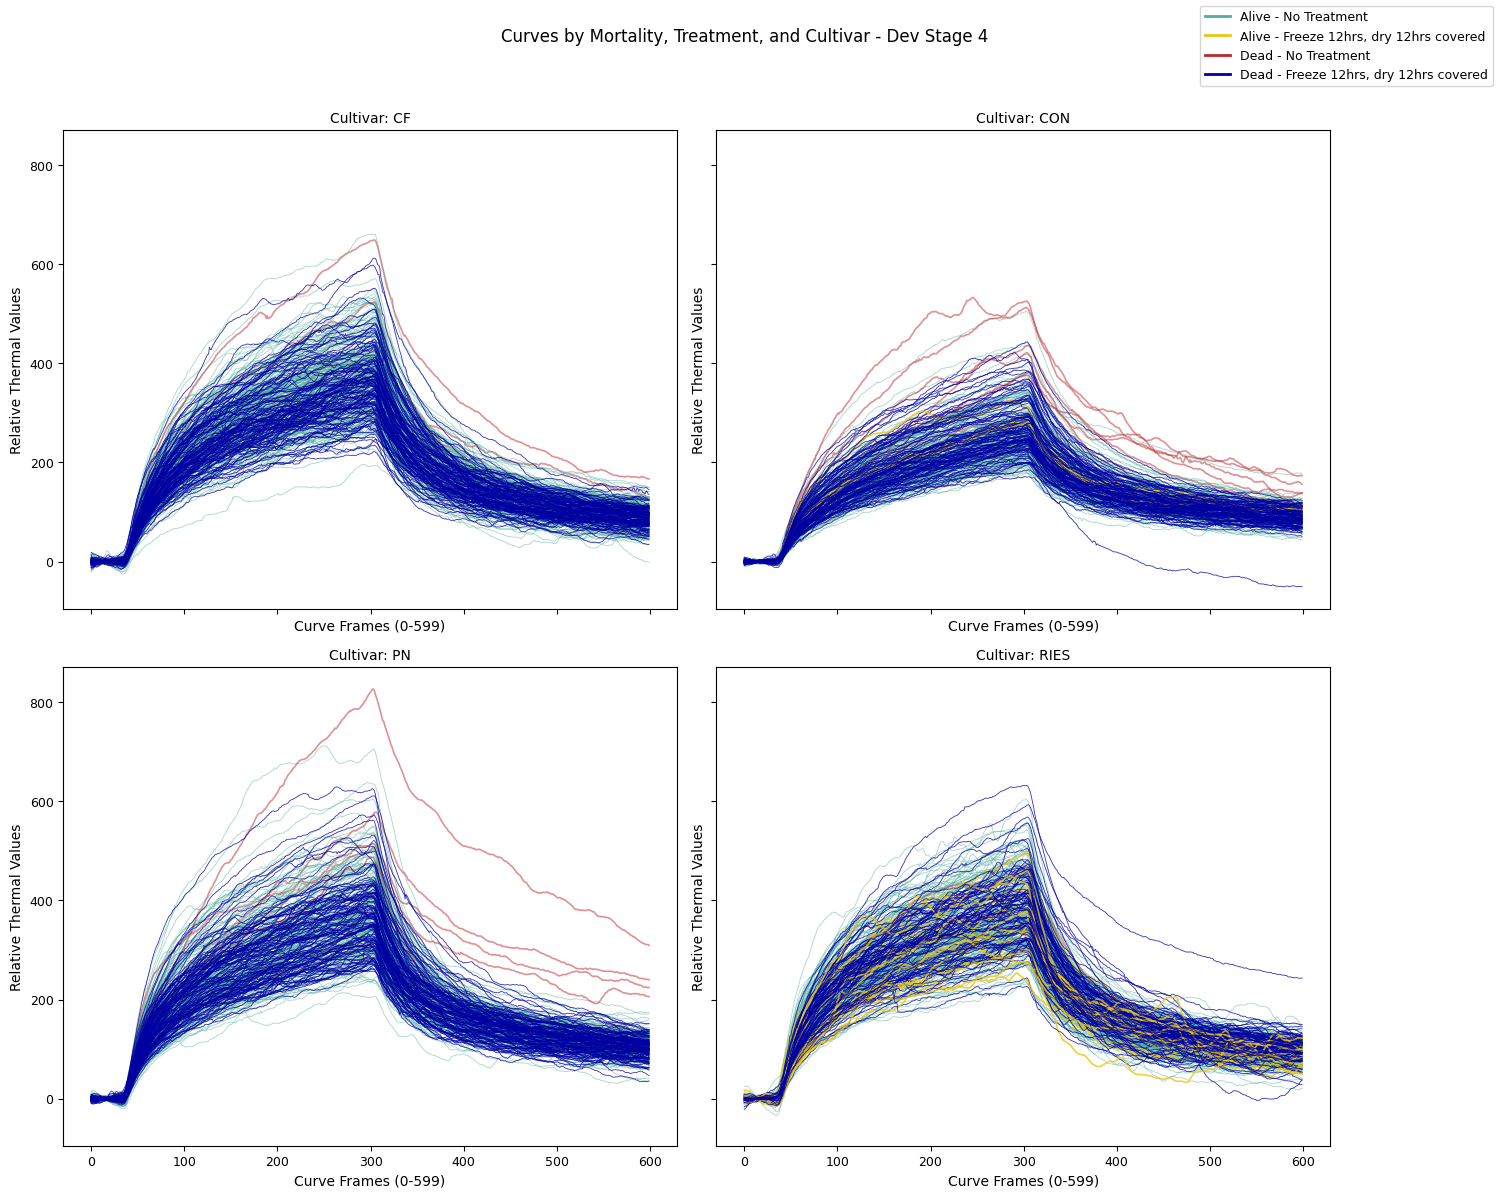

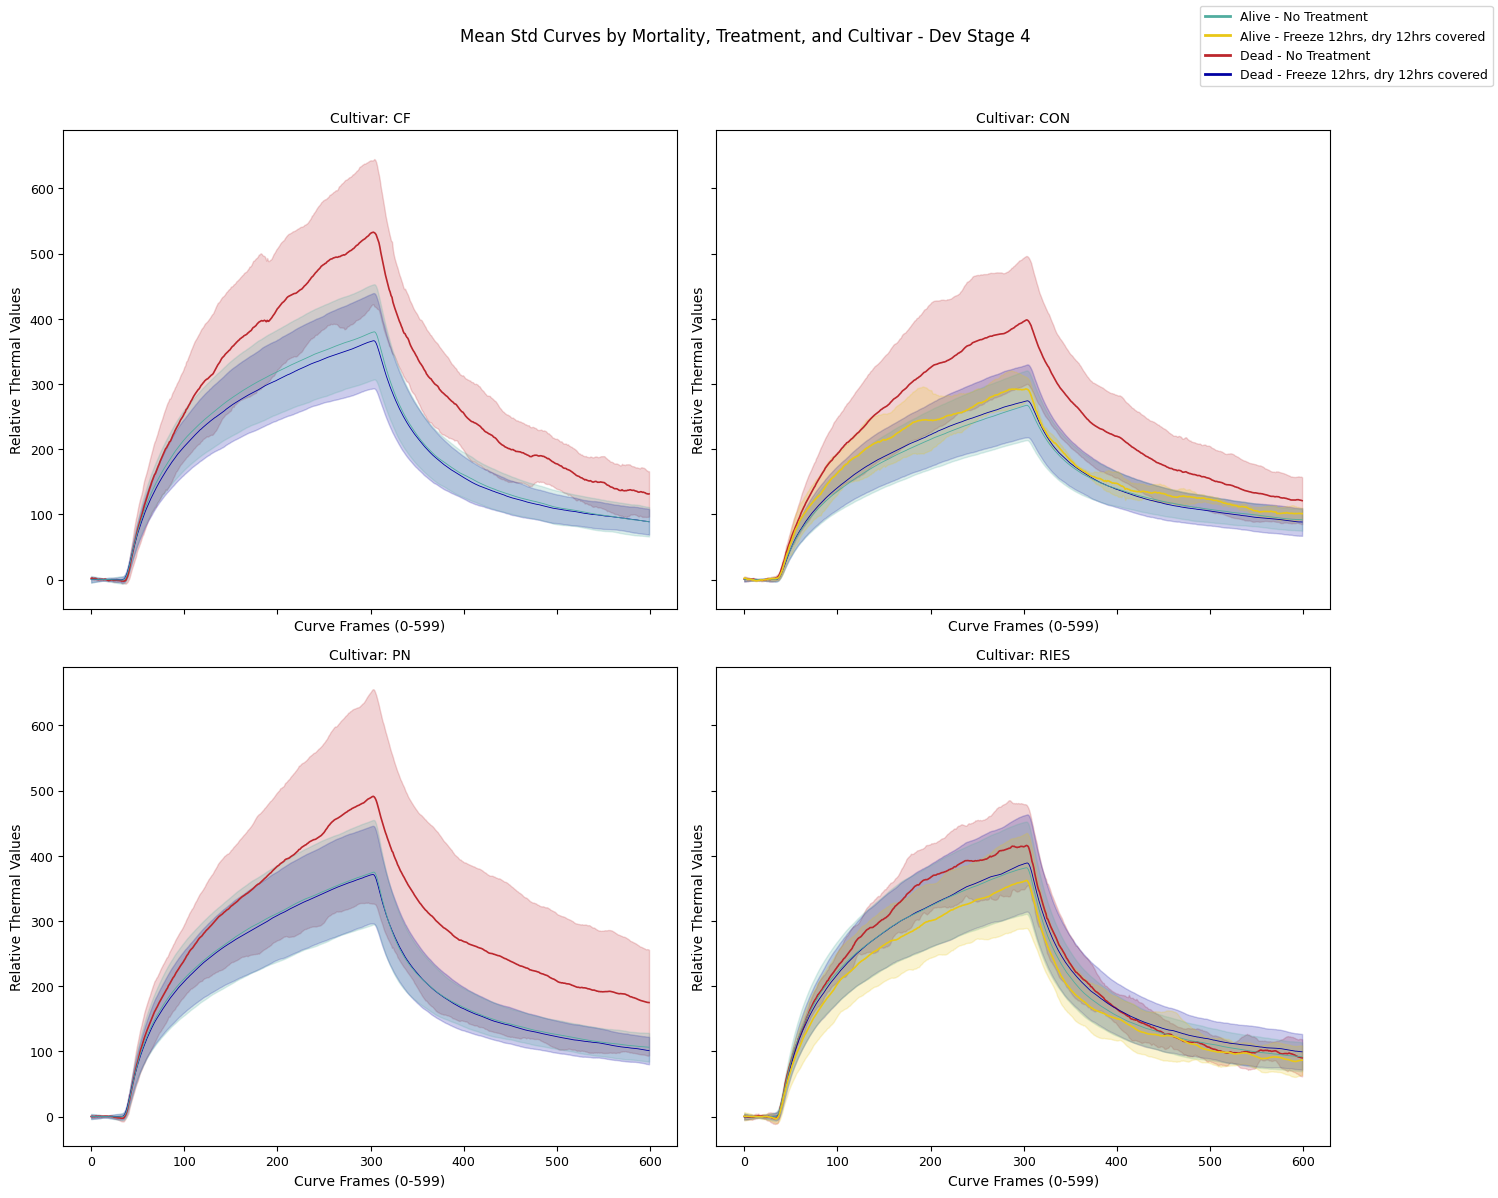

/var/folders/xg/96_j_3ms72n4410x6g1yggfh0000gn/T/ipykernel_9023/1437549041.py:127: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for mortality, group in cultivar_samples.groupby(['mortality']):
/var/folders/xg/96_j_3ms72n4410x6g1yggfh0000gn/T/ipykernel_9023/1437549041.py:127: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for mortality, group in cultivar_samples.groupby(['mortality']):
/var/folders/xg/96_j_3ms72n4410x6g1yggfh0000gn/T/ipykernel_9023/1437549041.py:127: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with 

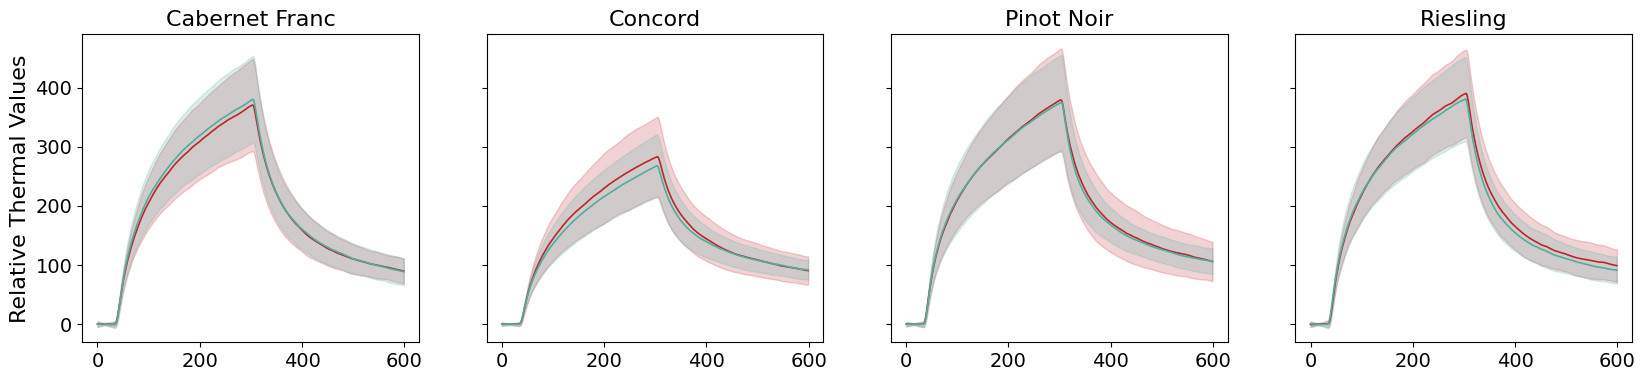

In [18]:
# Filter data for dev_stage 4 and ensure mortality is boolean
samples = data[data['dev_stage'] == 4].copy()
samples['mortality'] = samples['mortality'].astype(bool)

# Plot overall distribution of mortality and treatment
plt.figure(figsize=(10, 6))
plot = sns.countplot(data=samples, x='treatment', hue='mortality', palette={True: '#1a80bb', False: '#a00000'})
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='baseline', 
                  fontsize=10, color='black', xytext=(0, 5), 
                  textcoords='offset points')
plt.xlabel("Treatment")
plt.ylabel("Count of Samples")
plt.title("Distribution of Mortality by Treatment - Stage 4")
plt.legend(title='Mortality', labels=['False', 'True'])
plt.show()

# Plot distribution by cultivar
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
cultivars = samples['cultivar'].unique()
for idx, cultivar in enumerate(cultivars):
    ax = axs[idx // 2, idx % 2]
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    sns.countplot(data=cultivar_samples, x='treatment', hue='mortality', palette={True: '#1a80bb', False: '#a00000'}, ax=ax)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    ax.set_title(f"Cultivar: {cultivar}")
    ax.set_xlabel("Treatment")
    ax.set_ylabel("Count of Samples")
    ax.legend(title='Mortality', labels=['False', 'True'])

plt.suptitle("Distribution of Mortality by Treatment and Cultivar - Stage 4")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# Define curve columns and x-axis values
curve_columns = [col for col in samples.columns if col.startswith('curve_frame_')]
x_values = list(range(len(curve_columns)))

# Plot curves by cultivar with different styles for mortality and treatment
fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=True)
color_map = {
    (True, 2): ('#e9c716', 1.2, 0.8),  # Alive - Freeze 12hrs, dry 12hrs covered
    (True, 1): ('#50ad9f', 0.6, 0.5),       # Alive - No Treatment
    (False, 2): ('#0000a2', 0.6, 0.8),       # Dead - Freeze 12hrs, dry 12hrs covered
    (False, 1): ('#bc272d', 1.2, 0.5)         # Dead - No Treatment
}

for idx, cultivar in enumerate(cultivars):
    ax = axs[idx // 2, idx % 2]
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    for _, row in cultivar_samples.iterrows():
        color, linewidth, alpha = color_map[(row['mortality'], row['treatment'])]
        ax.plot(x_values, row[curve_columns], color=color, linewidth=linewidth, alpha=alpha)
    ax.set_title(f"Cultivar: {cultivar}")
    ax.set_xlabel("Curve Frames (0-599)")
    ax.set_ylabel("Relative Thermal Values")

# Add a common legend
fig.legend(
    handles=[
        Line2D([0], [0], color='#50ad9f', lw=2, label='Alive - No Treatment'),
        Line2D([0], [0], color='#e9c717', lw=2, label='Alive - Freeze 12hrs, dry 12hrs covered'),
        Line2D([0], [0], color='#bc272d', lw=2, label='Dead - No Treatment'),
        Line2D([0], [0], color='#0000a2', lw=2, label='Dead - Freeze 12hrs, dry 12hrs covered')
    ],
    loc='upper right'
)

plt.suptitle("Curves by Mortality, Treatment, and Cultivar - Dev Stage 4")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


# plot curves by cultivar with different styles for mortality and treatment, but plot a mean -+ std curve
fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=True)
for idx, cultivar in enumerate(cultivars):
    ax = axs[idx // 2, idx % 2]
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    for (mortality, treatment), group in cultivar_samples.groupby(['mortality', 'treatment']):
        group_mean = group[curve_columns].mean()
        group_std = group[curve_columns].std()
        color, linewidth, alpha = color_map[(mortality, treatment)]
        label = f"{'Alive' if mortality else 'Dead'} - Treatment {treatment}"
        ax.plot(x_values, group_mean, color=color, linewidth=linewidth, alpha=1.0, label=label)
        ax.fill_between(x_values, group_mean - group_std, group_mean + group_std, color=color, alpha=0.2)
    ax.set_title(f"Cultivar: {cultivar}")
    ax.set_xlabel("Curve Frames (0-599)")
    ax.set_ylabel("Relative Thermal Values")
fig.legend(
    handles=[
        Line2D([0], [0], color='#50ad9f', lw=2, label='Alive - No Treatment'),
        Line2D([0], [0], color='#e9c717', lw=2, label='Alive - Freeze 12hrs, dry 12hrs covered'),
        Line2D([0], [0], color='#bc272d', lw=2, label='Dead - No Treatment'),
        Line2D([0], [0], color='#0000a2', lw=2, label='Dead - Freeze 12hrs, dry 12hrs covered')
    ],
    loc='upper right'
)
plt.suptitle("Mean Std Curves by Mortality, Treatment, and Cultivar - Dev Stage 4")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


# plot curves by cultivar with different styles for mortality and treatment, plot a mean -+ std curve, but groups with only alive or dead
plt.rcParams.update({
    'font.size': 10,  # Set the minimum font size
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.titlesize': 12
})

fig, axs = plt.subplots(1, len(cultivars), figsize=(20, 4), sharex=True, sharey=True)  # Adjusted figsize for academic publication

for idx, cultivar in enumerate(cultivars):
    ax = axs[idx]  # Single row access
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    
    for mortality, group in cultivar_samples.groupby(['mortality']):
        group_mean = group[curve_columns].mean()
        group_std = group[curve_columns].std()
        color, linewidth, alpha = color_map[(mortality, 1)]
        label = f"{'Alive' if mortality else 'Dead'}"
        ax.plot(x_values, group_mean, color=color, linewidth=1.2, alpha=1.0, label=label)
        ax.fill_between(x_values, group_mean - group_std, group_mean + group_std, color=color, alpha=0.2)
        ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(f"{cultivar_map[cultivar]}", fontsize=16)
    if idx == 0:  # Add ylabel only to the first subplot
        ax.set_ylabel("Relative Thermal Values", fontsize=16)

# Save the plot as a high-quality image
plt.savefig('./plots/Figure5_stage3.svg', bbox_inches='tight')
plt.show()

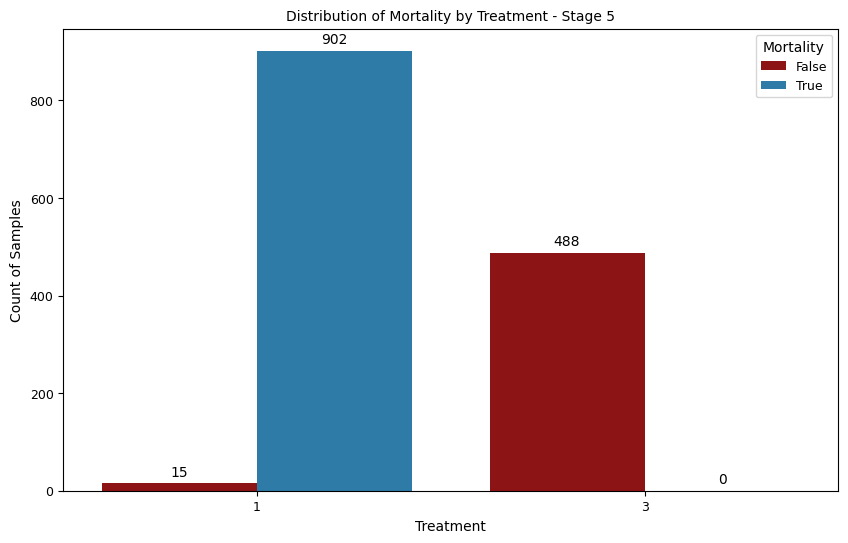

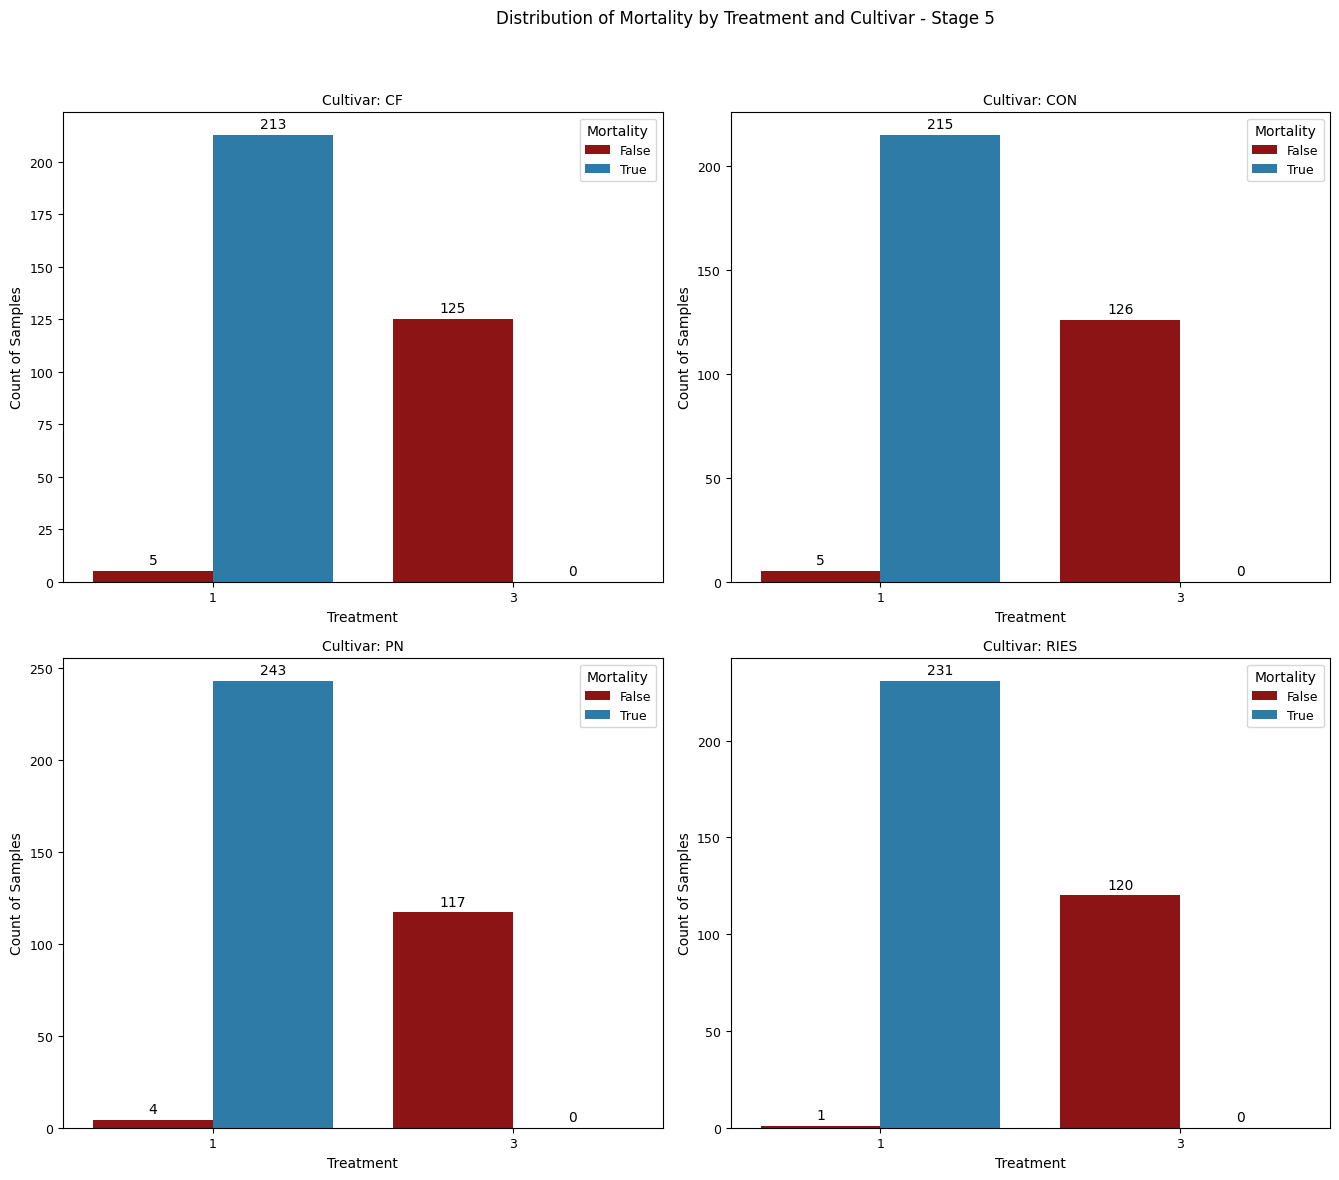

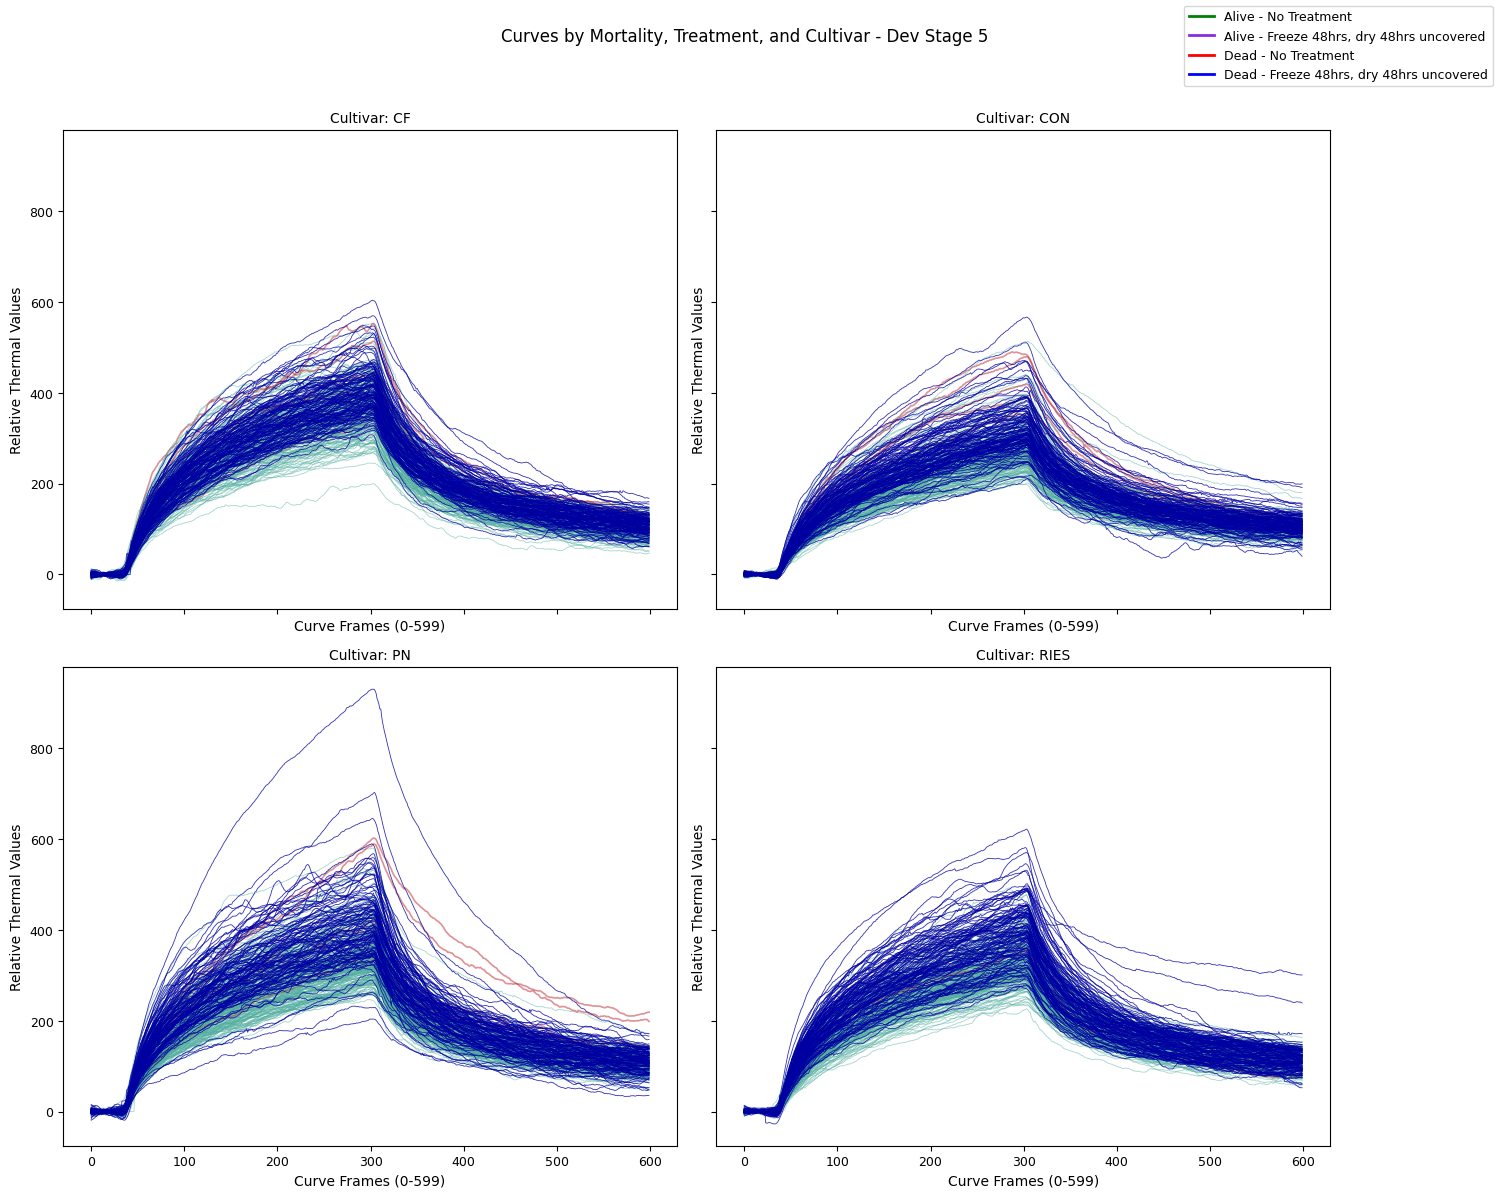

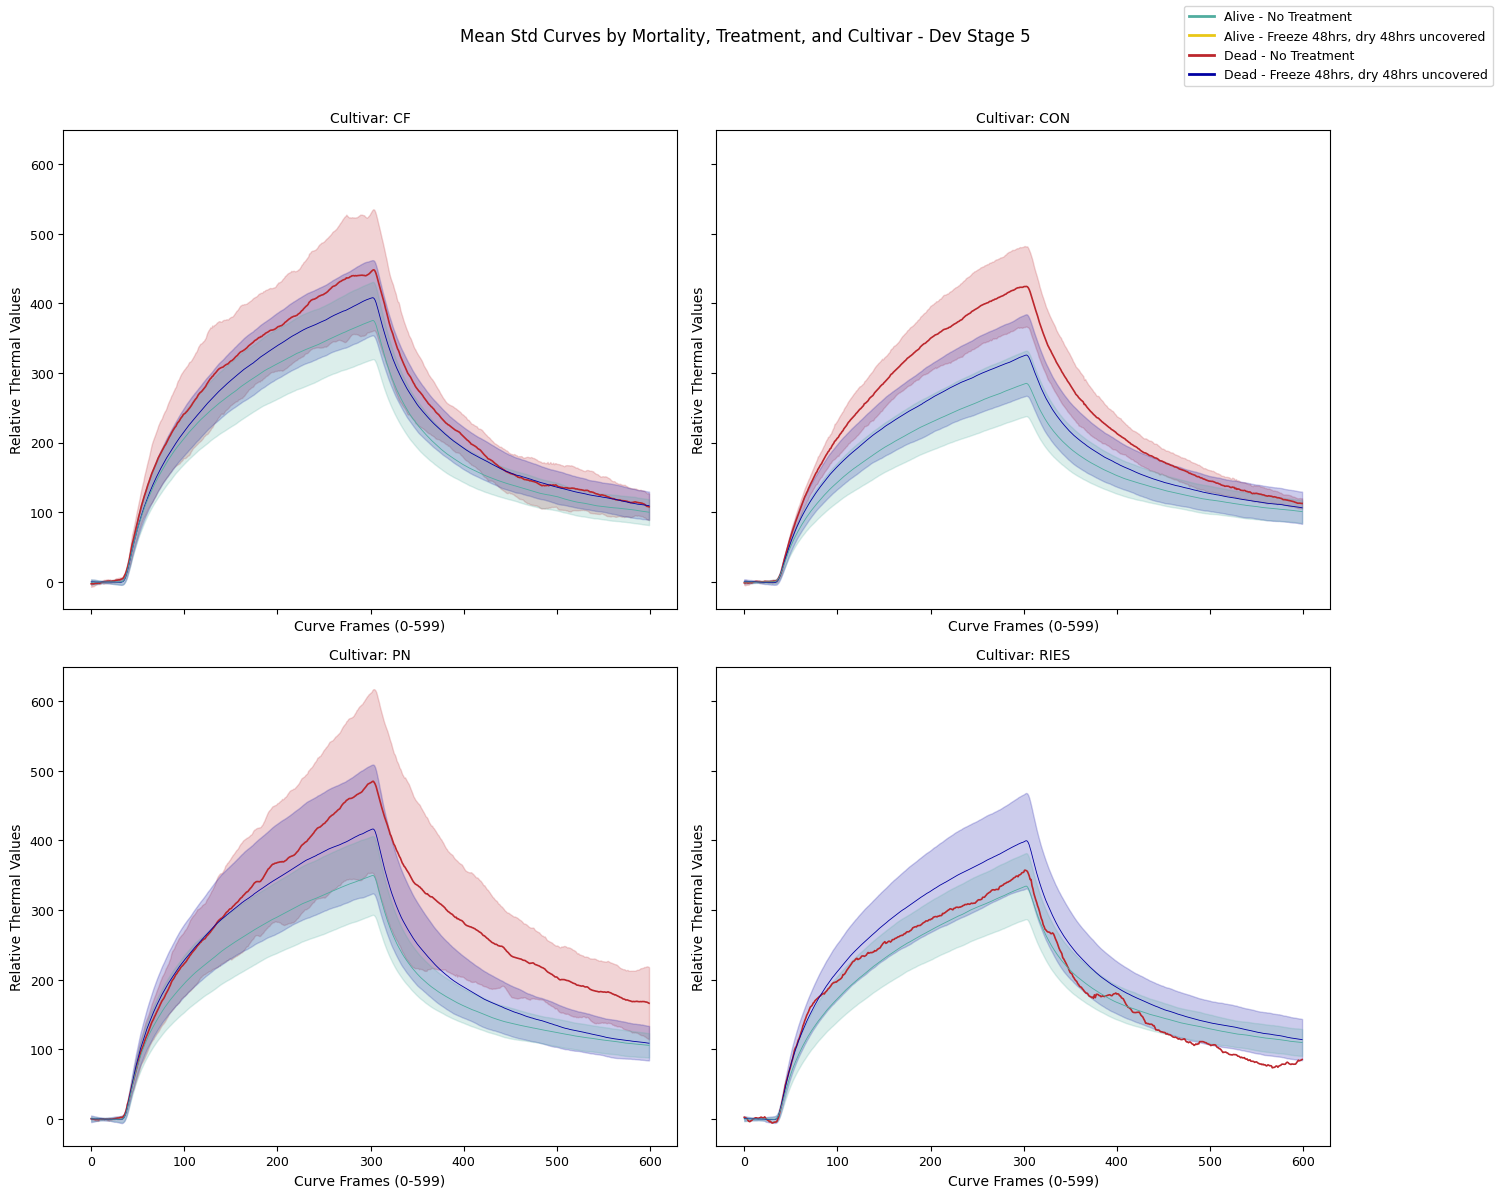

/var/folders/xg/96_j_3ms72n4410x6g1yggfh0000gn/T/ipykernel_9023/3394534754.py:127: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for mortality, group in cultivar_samples.groupby(['mortality']):
/var/folders/xg/96_j_3ms72n4410x6g1yggfh0000gn/T/ipykernel_9023/3394534754.py:127: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for mortality, group in cultivar_samples.groupby(['mortality']):
/var/folders/xg/96_j_3ms72n4410x6g1yggfh0000gn/T/ipykernel_9023/3394534754.py:127: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with 

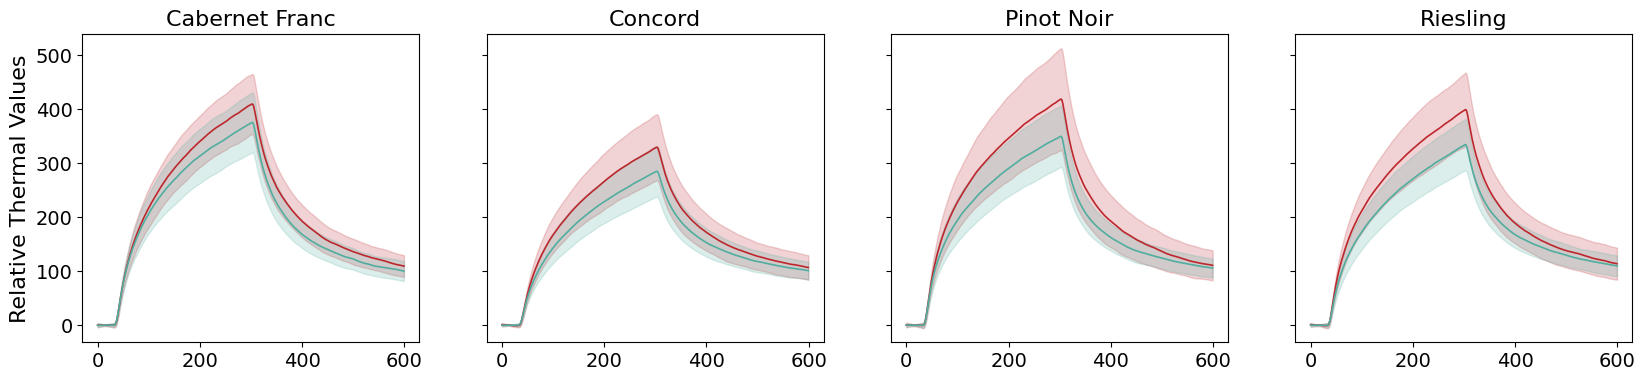

In [19]:
# Filter data for dev_stage 5 and ensure mortality is boolean
samples = data[data['dev_stage'] == 5].copy()
samples['mortality'] = samples['mortality'].astype(bool)

# Plot overall distribution of mortality and treatment
plt.figure(figsize=(10, 6))
plot = sns.countplot(data=samples, x='treatment', hue='mortality', palette={True: '#1a80bb', False: '#a00000'})
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='baseline', 
                  fontsize=10, color='black', xytext=(0, 5), 
                  textcoords='offset points')
plt.xlabel("Treatment")
plt.ylabel("Count of Samples")
plt.title("Distribution of Mortality by Treatment - Stage 5")
plt.legend(title='Mortality', labels=['False', 'True'])
plt.show()

# Plot distribution by cultivar
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
cultivars = samples['cultivar'].unique()
for idx, cultivar in enumerate(cultivars):
    ax = axs[idx // 2, idx % 2]
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    sns.countplot(data=cultivar_samples, x='treatment', hue='mortality', palette={True: '#1a80bb', False: '#a00000'}, ax=ax)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    ax.set_title(f"Cultivar: {cultivar}")
    ax.set_xlabel("Treatment")
    ax.set_ylabel("Count of Samples")
    ax.legend(title='Mortality', labels=['False', 'True'])

plt.suptitle("Distribution of Mortality by Treatment and Cultivar - Stage 5")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# Define curve columns and x-axis values
curve_columns = [col for col in samples.columns if col.startswith('curve_frame_')]
x_values = list(range(len(curve_columns)))

# Plot curves by cultivar with different styles for mortality and treatment
fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=True)
color_map = {
    (True, 3): ('#e9c716', 1.2, 0.8),  # Alive - Freeze 48hrs, dry 48hrs uncovered
    (True, 1): ('#50ad9f', 0.6, 0.5),       # Alive - No Treatment
    (False, 3): ('#0000a2', 0.6, 0.8),       # Dead - Freeze 48hrs, dry 48hrs uncovered
    (False, 1): ('#bc272d', 1.2, 0.5)         # Dead - No Treatment
}

for idx, cultivar in enumerate(cultivars):
    ax = axs[idx // 2, idx % 2]
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    for _, row in cultivar_samples.iterrows():
        color, linewidth, alpha = color_map[(row['mortality'], row['treatment'])]
        ax.plot(x_values, row[curve_columns], color=color, linewidth=linewidth, alpha=alpha)
    ax.set_title(f"Cultivar: {cultivar}")
    ax.set_xlabel("Curve Frames (0-599)")
    ax.set_ylabel("Relative Thermal Values")

# Add a common legend
fig.legend(
    handles=[
        Line2D([0], [0], color='green', lw=2, label='Alive - No Treatment'),
        Line2D([0], [0], color='blueviolet', lw=2, label='Alive - Freeze 48hrs, dry 48hrs uncovered'),
        Line2D([0], [0], color='red', lw=2, label='Dead - No Treatment'),
        Line2D([0], [0], color='blue', lw=2, label='Dead - Freeze 48hrs, dry 48hrs uncovered')
    ],
    loc='upper right'
)

plt.suptitle("Curves by Mortality, Treatment, and Cultivar - Dev Stage 5")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


# plot curves by cultivar with different styles for mortality and treatment, but plot a mean -+ std curve
fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=True)
for idx, cultivar in enumerate(cultivars):
    ax = axs[idx // 2, idx % 2]
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    for (mortality, treatment), group in cultivar_samples.groupby(['mortality', 'treatment']):
        group_mean = group[curve_columns].mean()
        group_std = group[curve_columns].std()
        color, linewidth, alpha = color_map[(mortality, treatment)]
        label = f"{'Alive' if mortality else 'Dead'} - Treatment {treatment}"
        ax.plot(x_values, group_mean, color=color, linewidth=linewidth, alpha=1.0, label=label)
        ax.fill_between(x_values, group_mean - group_std, group_mean + group_std, color=color, alpha=0.2)
    ax.set_title(f"Cultivar: {cultivar}")
    ax.set_xlabel("Curve Frames (0-599)")
    ax.set_ylabel("Relative Thermal Values")
fig.legend(
    handles=[
        Line2D([0], [0], color='#50ad9f', lw=2, label='Alive - No Treatment'),
        Line2D([0], [0], color='#e9c717', lw=2, label='Alive - Freeze 48hrs, dry 48hrs uncovered'),
        Line2D([0], [0], color='#bc272d', lw=2, label='Dead - No Treatment'),
        Line2D([0], [0], color='#0000a2', lw=2, label='Dead - Freeze 48hrs, dry 48hrs uncovered')
    ],
    loc='upper right'
)
plt.suptitle("Mean Std Curves by Mortality, Treatment, and Cultivar - Dev Stage 5")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


# plot curves by cultivar with different styles for mortality and treatment, plot a mean -+ std curve, but groups with only alive or dead
plt.rcParams.update({
    'font.size': 10,  # Set the minimum font size
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.titlesize': 12
})

fig, axs = plt.subplots(1, len(cultivars), figsize=(20, 4), sharex=True, sharey=True)

for idx, cultivar in enumerate(cultivars):
    ax = axs[idx]  # Single row access
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    
    for mortality, group in cultivar_samples.groupby(['mortality']):
        group_mean = group[curve_columns].mean()
        group_std = group[curve_columns].std()
        color, linewidth, alpha = color_map[(mortality, 1)]
        label = f"{'Alive' if mortality else 'Dead'}"
        ax.plot(x_values, group_mean, color=color, linewidth=1.2, alpha=1.0, label=label)
        ax.fill_between(x_values, group_mean - group_std, group_mean + group_std, color=color, alpha=0.2)
        ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(f"{cultivar_map[cultivar]}", fontsize=16)
    if idx == 0:  # Add ylabel only to the first subplot
        ax.set_ylabel("Relative Thermal Values", fontsize=16)

# Save the plot as a high-quality image
plt.savefig('./plots/Figure5_stage4.svg', bbox_inches='tight')
plt.show()

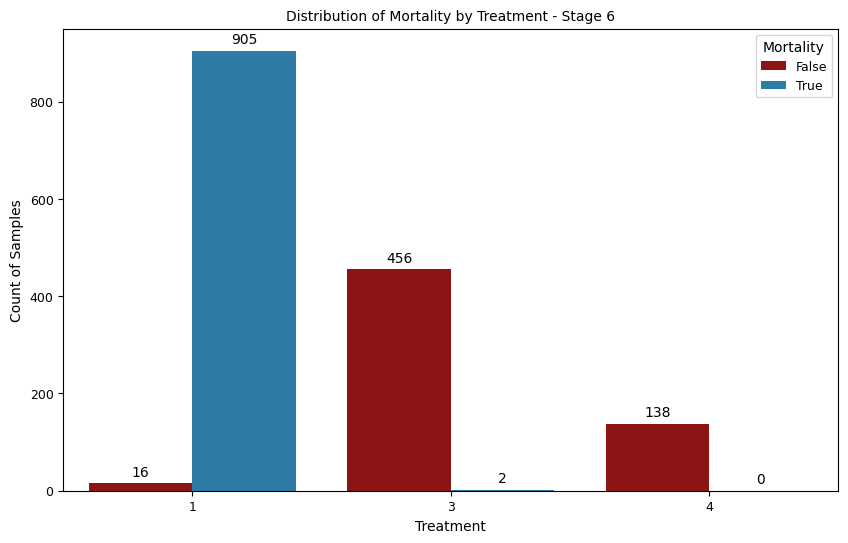

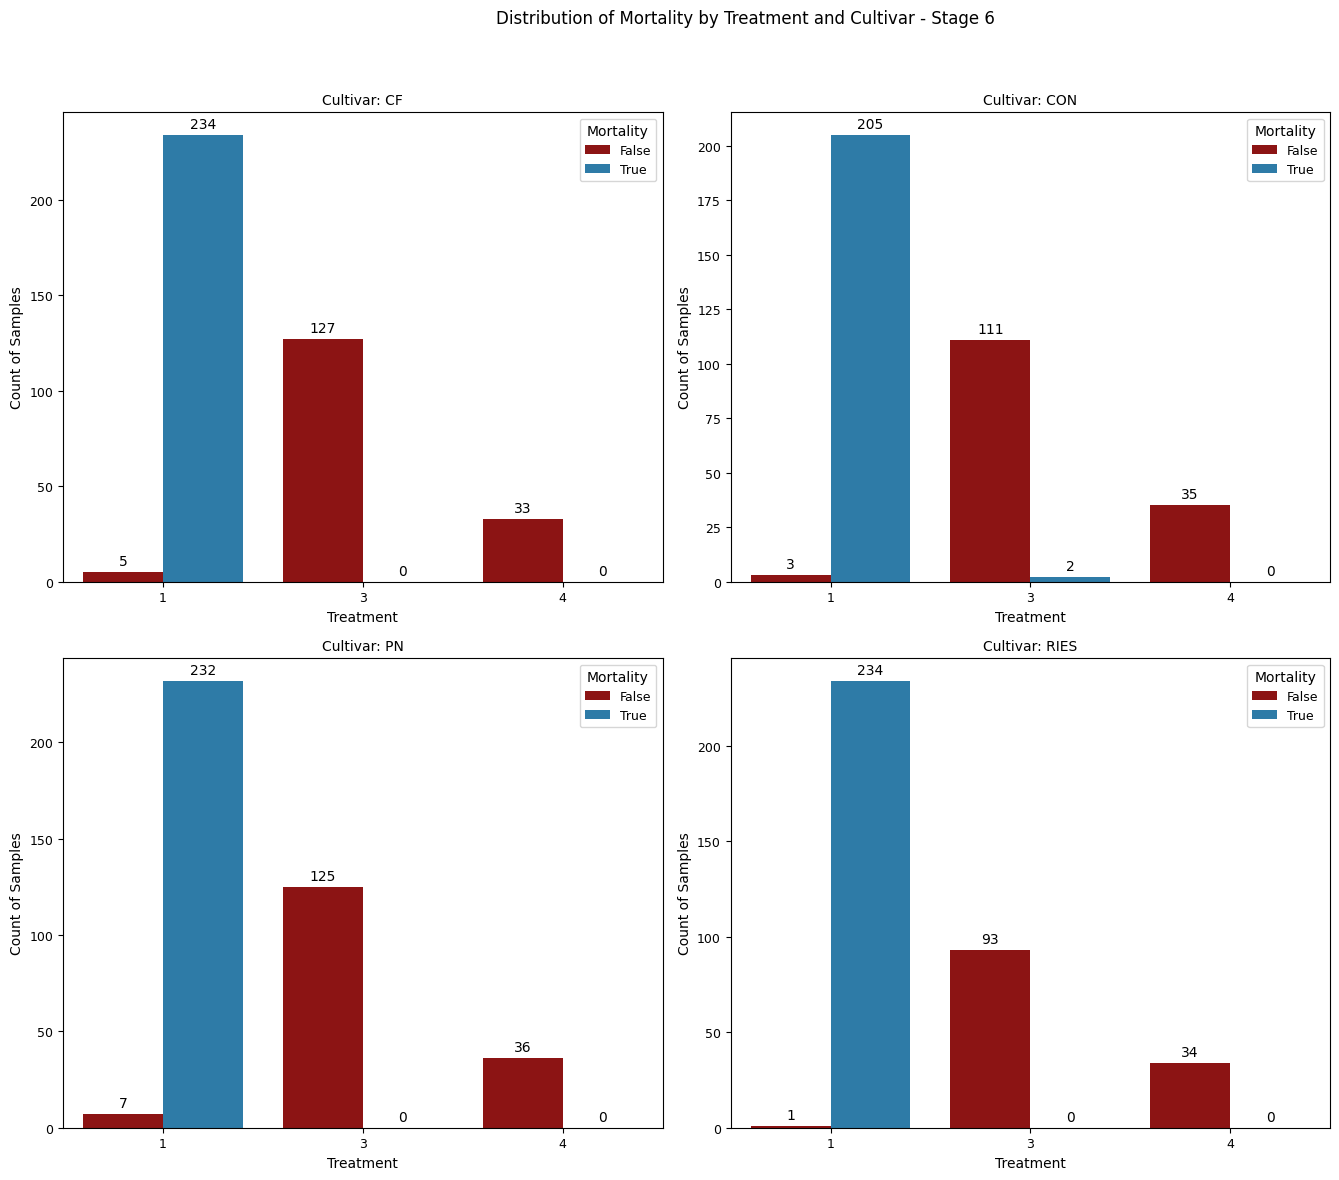

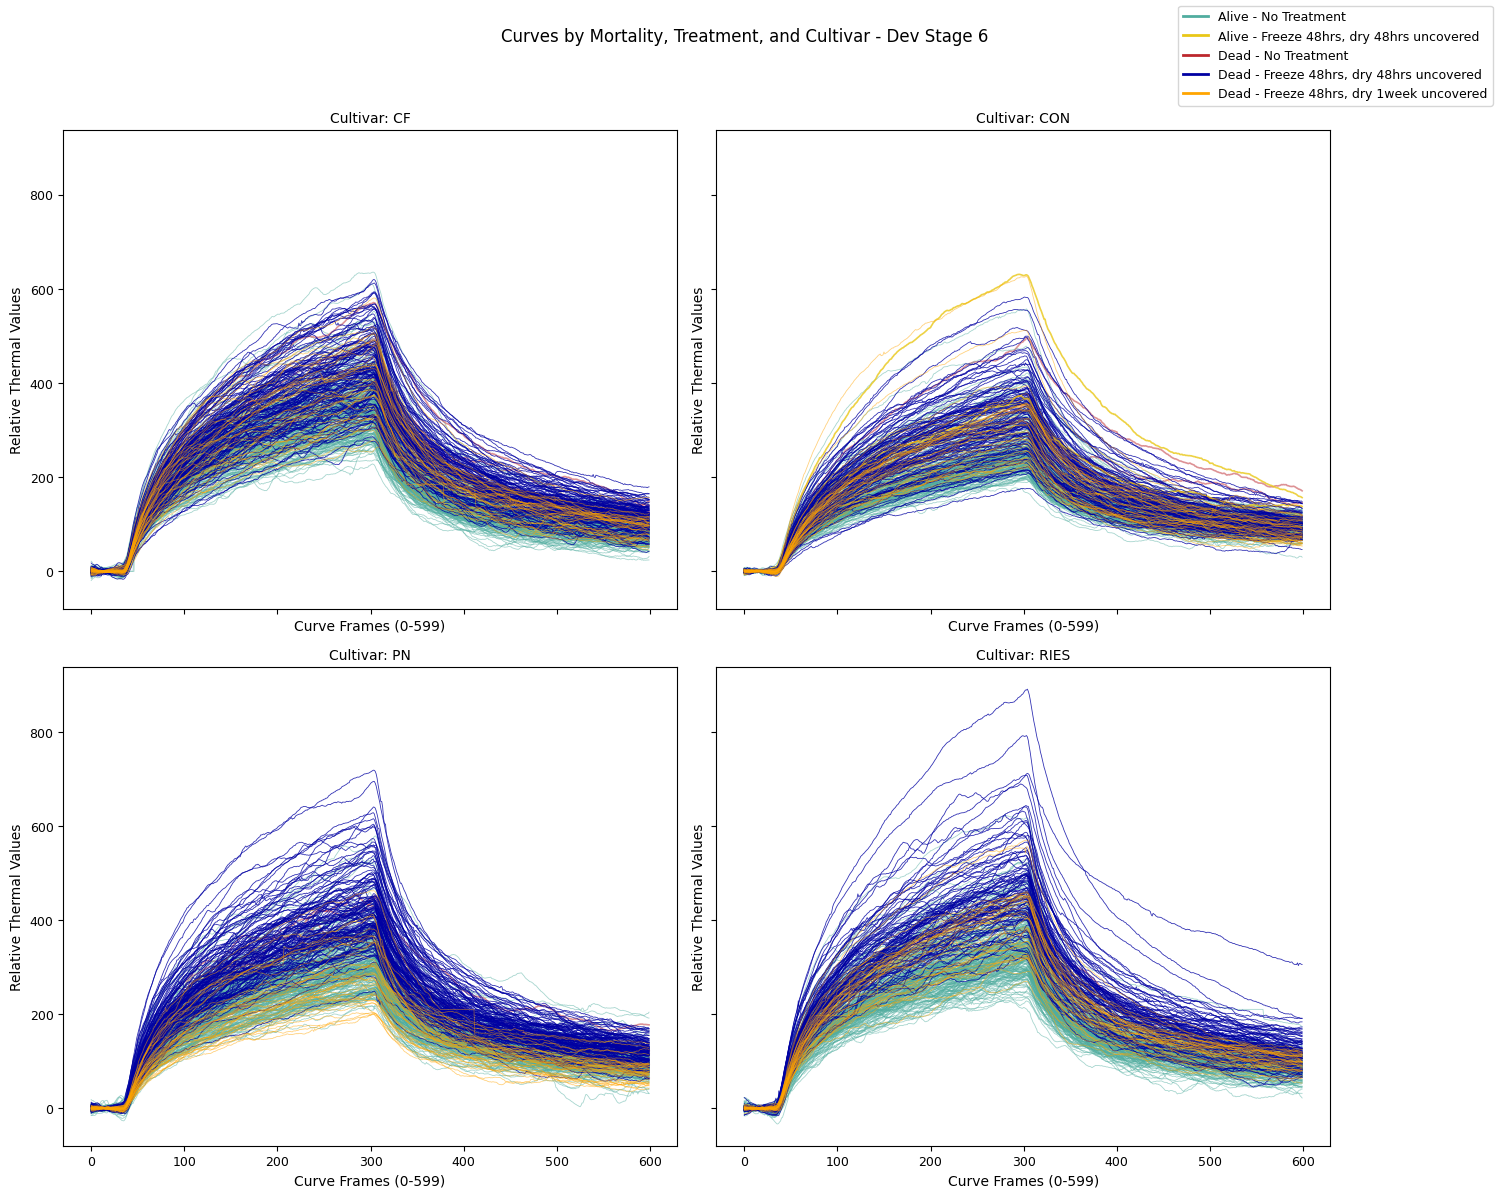

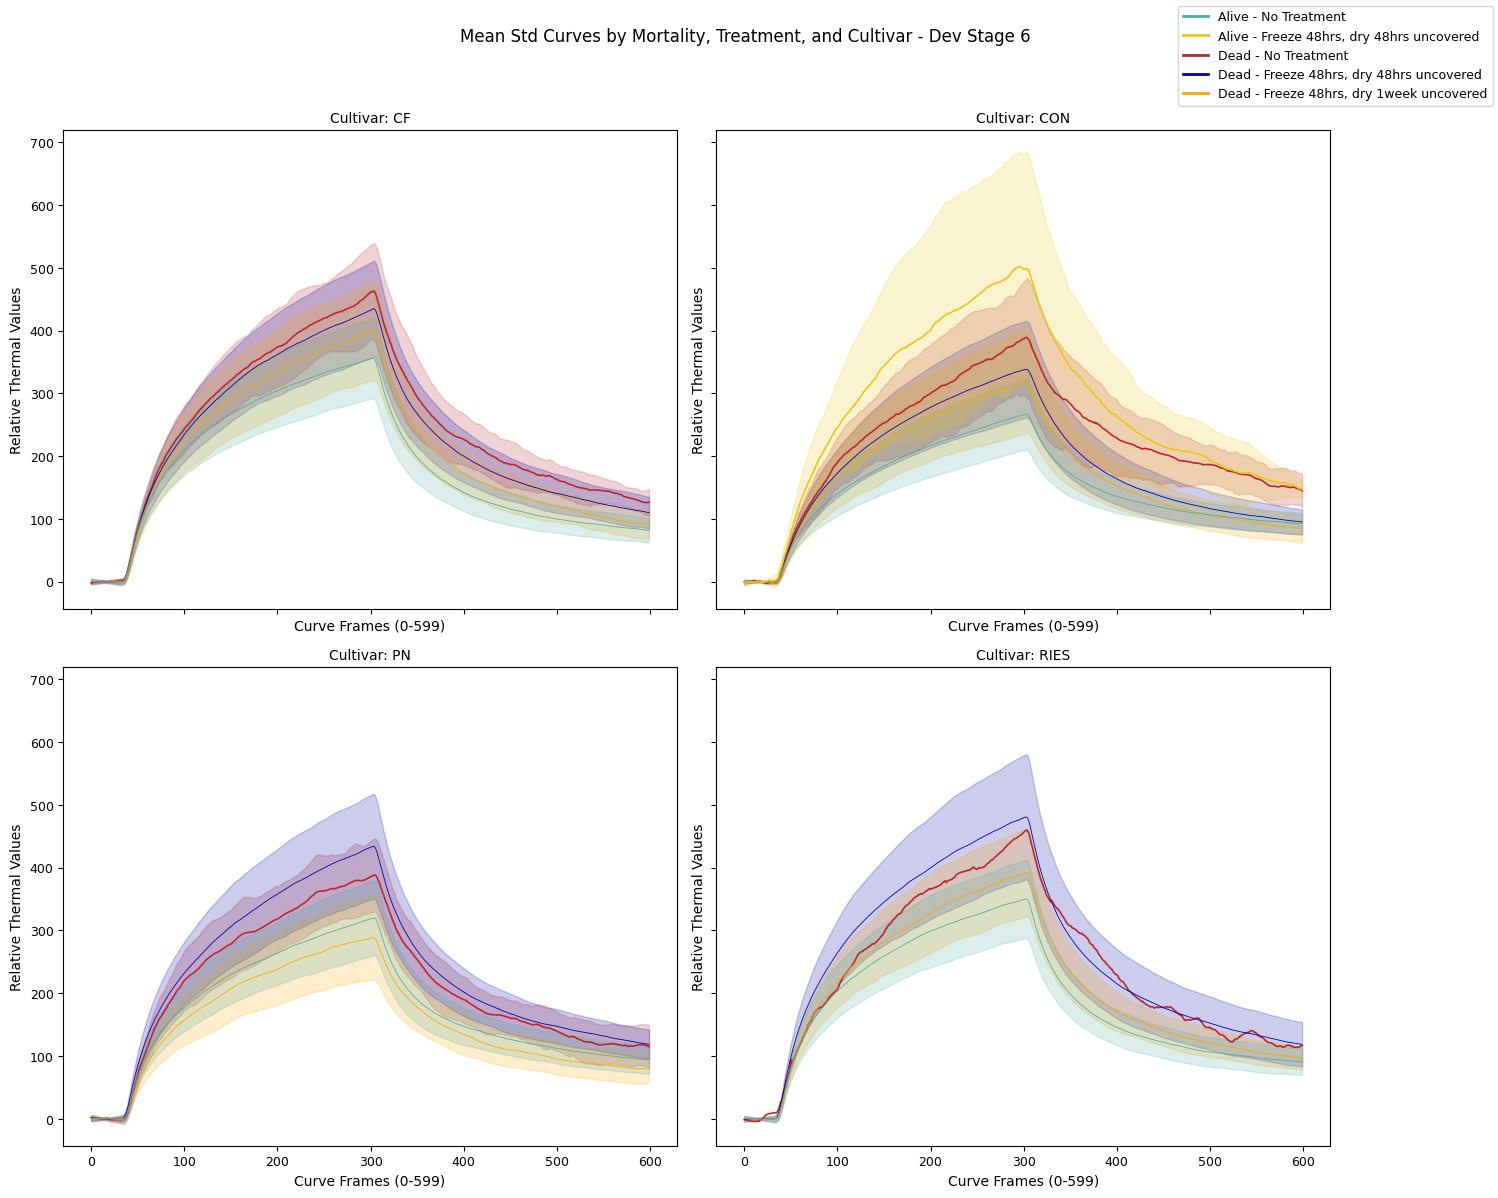

/var/folders/xg/96_j_3ms72n4410x6g1yggfh0000gn/T/ipykernel_9023/4170588097.py:133: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for mortality, group in cultivar_samples.groupby(['mortality']):
/var/folders/xg/96_j_3ms72n4410x6g1yggfh0000gn/T/ipykernel_9023/4170588097.py:133: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for mortality, group in cultivar_samples.groupby(['mortality']):
/var/folders/xg/96_j_3ms72n4410x6g1yggfh0000gn/T/ipykernel_9023/4170588097.py:133: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with 

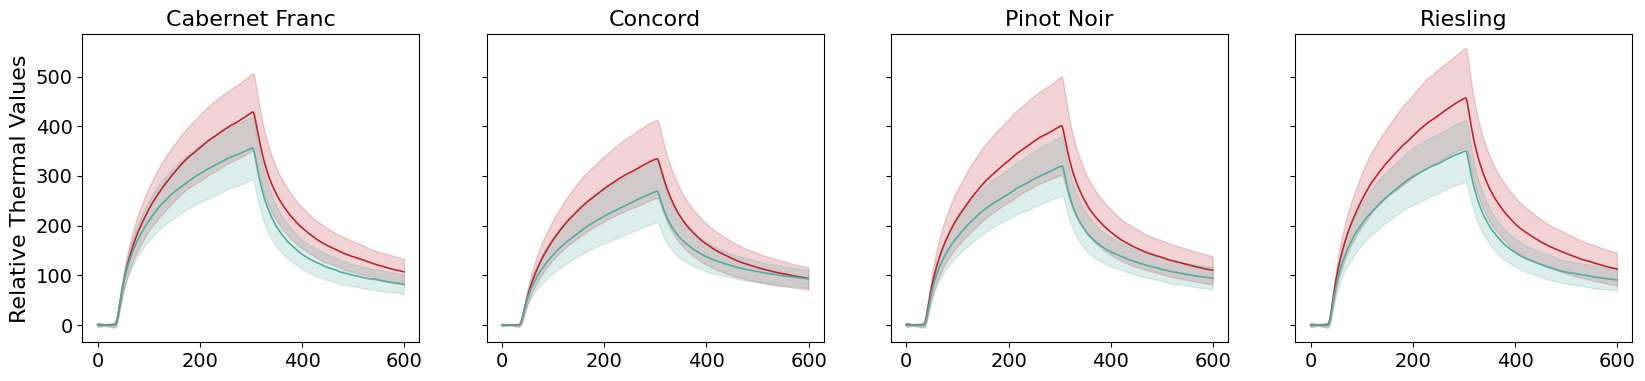

In [20]:
# Filter data for dev_stage 6 and ensure mortality is boolean
samples = data[data['dev_stage'] == 6].copy()
samples['mortality'] = samples['mortality'].astype(bool)

# make all treatment 4 to 3, and all treatment 5 to 4
samples['treatment'] = samples['treatment'].replace({4: 3, 5: 4})

# Plot overall distribution of mortality and treatment
plt.figure(figsize=(10, 6))
plot = sns.countplot(data=samples, x='treatment', hue='mortality', palette={True: '#1a80bb', False: '#a00000'})
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='baseline', 
                  fontsize=10, color='black', xytext=(0, 5), 
                  textcoords='offset points')
plt.xlabel("Treatment")
plt.ylabel("Count of Samples")
plt.title("Distribution of Mortality by Treatment - Stage 6")
plt.legend(title='Mortality', labels=['False', 'True'])
plt.show()

# Plot distribution by cultivar
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
cultivars = samples['cultivar'].unique()
for idx, cultivar in enumerate(cultivars):
    ax = axs[idx // 2, idx % 2]
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    sns.countplot(data=cultivar_samples, x='treatment', hue='mortality', palette={True: '#1a80bb', False: '#a00000'}, ax=ax)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    ax.set_title(f"Cultivar: {cultivar}")
    ax.set_xlabel("Treatment")
    ax.set_ylabel("Count of Samples")
    ax.legend(title='Mortality', labels=['False', 'True'])

plt.suptitle("Distribution of Mortality by Treatment and Cultivar - Stage 6")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

# Define curve columns and x-axis values
curve_columns = [col for col in samples.columns if col.startswith('curve_frame_')]
x_values = list(range(len(curve_columns)))

# Plot curves by cultivar with different styles for mortality and treatment
fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=True)
color_map = {
    (True, 3): ('#e9c716', 1.2, 0.8),  # Alive - Freeze 48hrs, dry 48hrs uncovered
    (True, 1): ('#50ad9f', 0.6, 0.5),       # Alive - No Treatment
    (False, 3): ('#0000a2', 0.6, 0.8),       # Dead - Freeze 48hrs, dry 48hrs uncovered
    (False, 1): ('#bc272d', 1.2, 0.5),        # Dead - No Treatment
    (False, 4): ('orange', 0.6, 0.5)      # Dead - Freeze 48hrs, dry 1week uncovered
}

for idx, cultivar in enumerate(cultivars):
    ax = axs[idx // 2, idx % 2]
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    for _, row in cultivar_samples.iterrows():
        color, linewidth, alpha = color_map[(row['mortality'], row['treatment'])]
        ax.plot(x_values, row[curve_columns], color=color, linewidth=linewidth, alpha=alpha)
    ax.set_title(f"Cultivar: {cultivar}")
    ax.set_xlabel("Curve Frames (0-599)")
    ax.set_ylabel("Relative Thermal Values")

# Add a common legend
fig.legend(
    handles=[
        Line2D([0], [0], color='#50ad9f', lw=2, label='Alive - No Treatment'),
        Line2D([0], [0], color='#e9c717', lw=2, label='Alive - Freeze 48hrs, dry 48hrs uncovered'),
        Line2D([0], [0], color='#bc272d', lw=2, label='Dead - No Treatment'),
        Line2D([0], [0], color='#0000a2', lw=2, label='Dead - Freeze 48hrs, dry 48hrs uncovered'),
        Line2D([0], [0], color='orange', lw=2, label='Dead - Freeze 48hrs, dry 1week uncovered')
    ],
    loc='upper right'
)

plt.suptitle("Curves by Mortality, Treatment, and Cultivar - Dev Stage 6")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


# plot curves by cultivar with different styles for mortality and treatment, but plot a mean -+ std curve
fig, axs = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=True)
for idx, cultivar in enumerate(cultivars):
    ax = axs[idx // 2, idx % 2]
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    for (mortality, treatment), group in cultivar_samples.groupby(['mortality', 'treatment']):
        group_mean = group[curve_columns].mean()
        group_std = group[curve_columns].std()
        color, linewidth, alpha = color_map[(mortality, treatment)]
        label = f"{'Alive' if mortality else 'Dead'} - Treatment {treatment}"
        ax.plot(x_values, group_mean, color=color, linewidth=linewidth, alpha=1.0, label=label)
        ax.fill_between(x_values, group_mean - group_std, group_mean + group_std, color=color, alpha=0.2)
    ax.set_title(f"Cultivar: {cultivar}")
    ax.set_xlabel("Curve Frames (0-599)")
    ax.set_ylabel("Relative Thermal Values")
fig.legend(
    handles=[
        Line2D([0], [0], color='#50ad9f', lw=2, label='Alive - No Treatment'),
        Line2D([0], [0], color='#e9c717', lw=2, label='Alive - Freeze 48hrs, dry 48hrs uncovered'),
        Line2D([0], [0], color='#bc272d', lw=2, label='Dead - No Treatment'),
        Line2D([0], [0], color='#0000a2', lw=2, label='Dead - Freeze 48hrs, dry 48hrs uncovered'),
        Line2D([0], [0], color='orange', lw=2, label='Dead - Freeze 48hrs, dry 1week uncovered')
    ],
    loc='upper right'
)
plt.suptitle("Mean Std Curves by Mortality, Treatment, and Cultivar - Dev Stage 6")
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


# plot curves by cultivar with different styles for mortality and treatment, plot a mean -+ std curve, but groups with only alive or dead
plt.rcParams.update({
    'font.size': 10,  # Set the minimum font size
    'axes.titlesize': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'figure.titlesize': 12
})

fig, axs = plt.subplots(1, len(cultivars), figsize=(20, 4), sharex=True, sharey=True)  # Adjusted figsize for academic publication

for idx, cultivar in enumerate(cultivars):
    ax = axs[idx]  # Single row access
    cultivar_samples = samples[samples['cultivar'] == cultivar]
    
    for mortality, group in cultivar_samples.groupby(['mortality']):
        group_mean = group[curve_columns].mean()
        group_std = group[curve_columns].std()
        color, linewidth, alpha = color_map[(mortality, 1)]
        label = f"{'Alive' if mortality else 'Dead'}"
        ax.plot(x_values, group_mean, color=color, linewidth=1.2, alpha=1.0, label=label)
        ax.fill_between(x_values, group_mean - group_std, group_mean + group_std, color=color, alpha=0.2)
        ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(f"{cultivar_map[cultivar]}", fontsize=16)
    if idx == 0:  # Add ylabel only to the first subplot
        ax.set_ylabel("Relative Thermal Values", fontsize=16)

# Save the plot as a high-quality image
plt.savefig('./plots/Figure5_stage5.svg', bbox_inches='tight')
plt.show()